## Some packages import

In [0]:
import glob
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy as sc
import astropy as ap
import seaborn as sn

%matplotlib inline

pd.set_option('display.max_columns', None)
sn.set_palette("pastel")


## Pulling the desired file

In [40]:
met = input("Enter the value of met: ")
n_file = input("Enter the value of n_file: ")

Enter the value of met: 0001
Enter the value of n_file: 13


In [41]:
folder = f'./data/sevn_output_Z0.{met}A1L1/data_0'
filename = folder + f'/output_{n_file}.csv'

file = pd.read_csv(filename)

#print(file.columns.tolist())

## A bit of preprocessing

In [42]:
# select bh+star systems

mask = ((file['RemnantType_0'] == 6) & (file['RemnantType_1'].isin([0,1,2,3,4,5]))) | ((file['RemnantType_1'] == 6) & (file['RemnantType_0'].isin([0,1,2,3,4,5])))

bh_star_df = file[mask]

In [43]:
bh_star_df.head(5)

ID               name    Mass_0  MHE_0  MCO_0  Radius_0  RHE_0  RCO_0   
38  130002  0_648213230665559  39.47724    0.0    0.0  0.000168    0.0    0.0  \
39  130002  0_648213230665559  39.47724    0.0    0.0  0.000168    0.0    0.0   
40  130002  0_648213230665559  39.48017    0.0    0.0  0.000168    0.0    0.0   
41  130002  0_648213230665559  39.48019    0.0    0.0  0.000168    0.0    0.0   
42  130002  0_648213230665559  39.48022    0.0    0.0  0.000168    0.0    0.0   

    Luminosity_0  Temperature_0  Lambda_0  Phase_0  PhaseBSE_0  RemnantType_0   
38  1.000000e-10       1409.984       NaN        7        14.0              6  \
39  1.000000e-10       1409.984       NaN        7        14.0              6   
40  1.000000e-10       1409.931       NaN        7        14.0              6   
41  1.000000e-10       1409.931       NaN        7        14.0              6   
42  1.000000e-10       1409.931       NaN        7        14.0              6   

    Zams_0    Mass_1     MHE_1  MCO_1   Radius_1     RHE_1  RCO_1   
38  46.189  26.43605  0.000000    0.0   6.344296  0.000000    0.0  \
39  46.189  26.43605  0.000000    0.0   6.344296  0.000000    0.0   
40  46.189  26.41938  0.000010    0.0  12.498740  0.000001    0.0   
41  46.189  26.41930  9.004382    0.0  11.408740  0.640445    0.0   
42  46.189  26.41919  9.206563    0.0  18.588360  0.487934    0.0   

    Luminosity_1  Temperature_1  Lambda_1  Phase_1  PhaseBSE_1  RemnantType_1   
38      139411.9       44280.23       NaN        1         1.0              0  \
39      139411.9       44280.23       NaN        1         1.0              0   
40      226865.1       35631.60  0.556823        2         2.0              0   
41      240138.5       37828.85  0.577522        3         2.0              0   
42      260923.7       30257.60  0.475081        3         2.0              0   

      Zams_1  Semimajor  Eccentricity    GWtime  BWorldtime  BEvent  
38  26.22293   50.93178      0.007586  14690.31    4.484118       0  
39  26.22293   50.93178      0.007586  14690.31    4.484118       5  
40  26.22293   51.88965      0.006375  15840.08    6.887702       0  
41  26.22293   52.00359      0.006379  15979.72    6.894693       0  
42  26.22293   51.56410      0.000000  15448.70    6.903503       4

In [5]:
# dividing non-interacting and interacting sys

non_interacting_sys_df = bh_star_df[bh_star_df['BEvent'] == 0]

interacting_sys_df = bh_star_df[bh_star_df['BEvent'] != 0]


# selecting only binary sys 

non_int_binsys = non_interacting_sys_df[non_interacting_sys_df['Semimajor'].notna()]

int_binsys = interacting_sys_df[interacting_sys_df['Semimajor'].notna()]


In [6]:
# adding column Period to non_int_binsys

from astropy import constants as const
from astropy import units as u

semimaj = non_int_binsys['Semimajor']* const.R_sun
mass_tot = (non_int_binsys['Mass_0'] * const.M_sun) + (non_int_binsys['Mass_1'] * const.M_sun)

s_to_day = 60*60*24

period = (2*m.pi*np.sqrt( semimaj**3 / (const.G * mass_tot) )) / s_to_day

non_int_binsys.insert(loc=30, column='Period', value = period)

In [7]:
# adding column Period to int_binsys

semimaj = int_binsys['Semimajor']* const.R_sun
mass_tot = (int_binsys['Mass_0'] * const.M_sun) + (int_binsys['Mass_1'] * const.M_sun)

period = (2*m.pi*np.sqrt( semimaj**3 / (const.G * mass_tot) )) / s_to_day

int_binsys.insert(loc=30, column='Period', value = period)

In [8]:
print(int_binsys.columns.tolist())

['ID', 'name', 'Mass_0', 'MHE_0', 'MCO_0', 'Radius_0', 'RHE_0', 'RCO_0', 'Luminosity_0', 'Temperature_0', 'Lambda_0', 'Phase_0', 'PhaseBSE_0', 'RemnantType_0', 'Zams_0', 'Mass_1', 'MHE_1', 'MCO_1', 'Radius_1', 'RHE_1', 'RCO_1', 'Luminosity_1', 'Temperature_1', 'Lambda_1', 'Phase_1', 'PhaseBSE_1', 'RemnantType_1', 'Zams_1', 'Semimajor', 'Eccentricity', 'Period', 'GWtime', 'BWorldtime', 'BEvent']


## Correlation analysis and plot

In [9]:
# discarding outliers

cols = ['Mass_0', 'Radius_0', 'Temperature_0', 'Mass_1', 'Radius_1', 'Luminosity_1', 'Temperature_1', 'Semimajor', 'Eccentricity', 'Period']

q_low = int_binsys[cols].quantile(0.01)
q_hi  = int_binsys[cols].quantile(0.99)

df_filtered = int_binsys[(int_binsys[cols] < q_hi) & (int_binsys[cols] > q_low)]

In [10]:
# filling NaN values

df_filtered = df_filtered[cols].interpolate(method='piecewise_polynomial', order=2).dropna()

In [11]:
(df_filtered<0).sum()

Mass_0           0
Radius_0         0
Temperature_0    0
Mass_1           0
Radius_1         0
Luminosity_1     0
Temperature_1    0
Semimajor        0
Eccentricity     0
Period           0
dtype: int64

<Figure size 2000x1500 with 0 Axes>

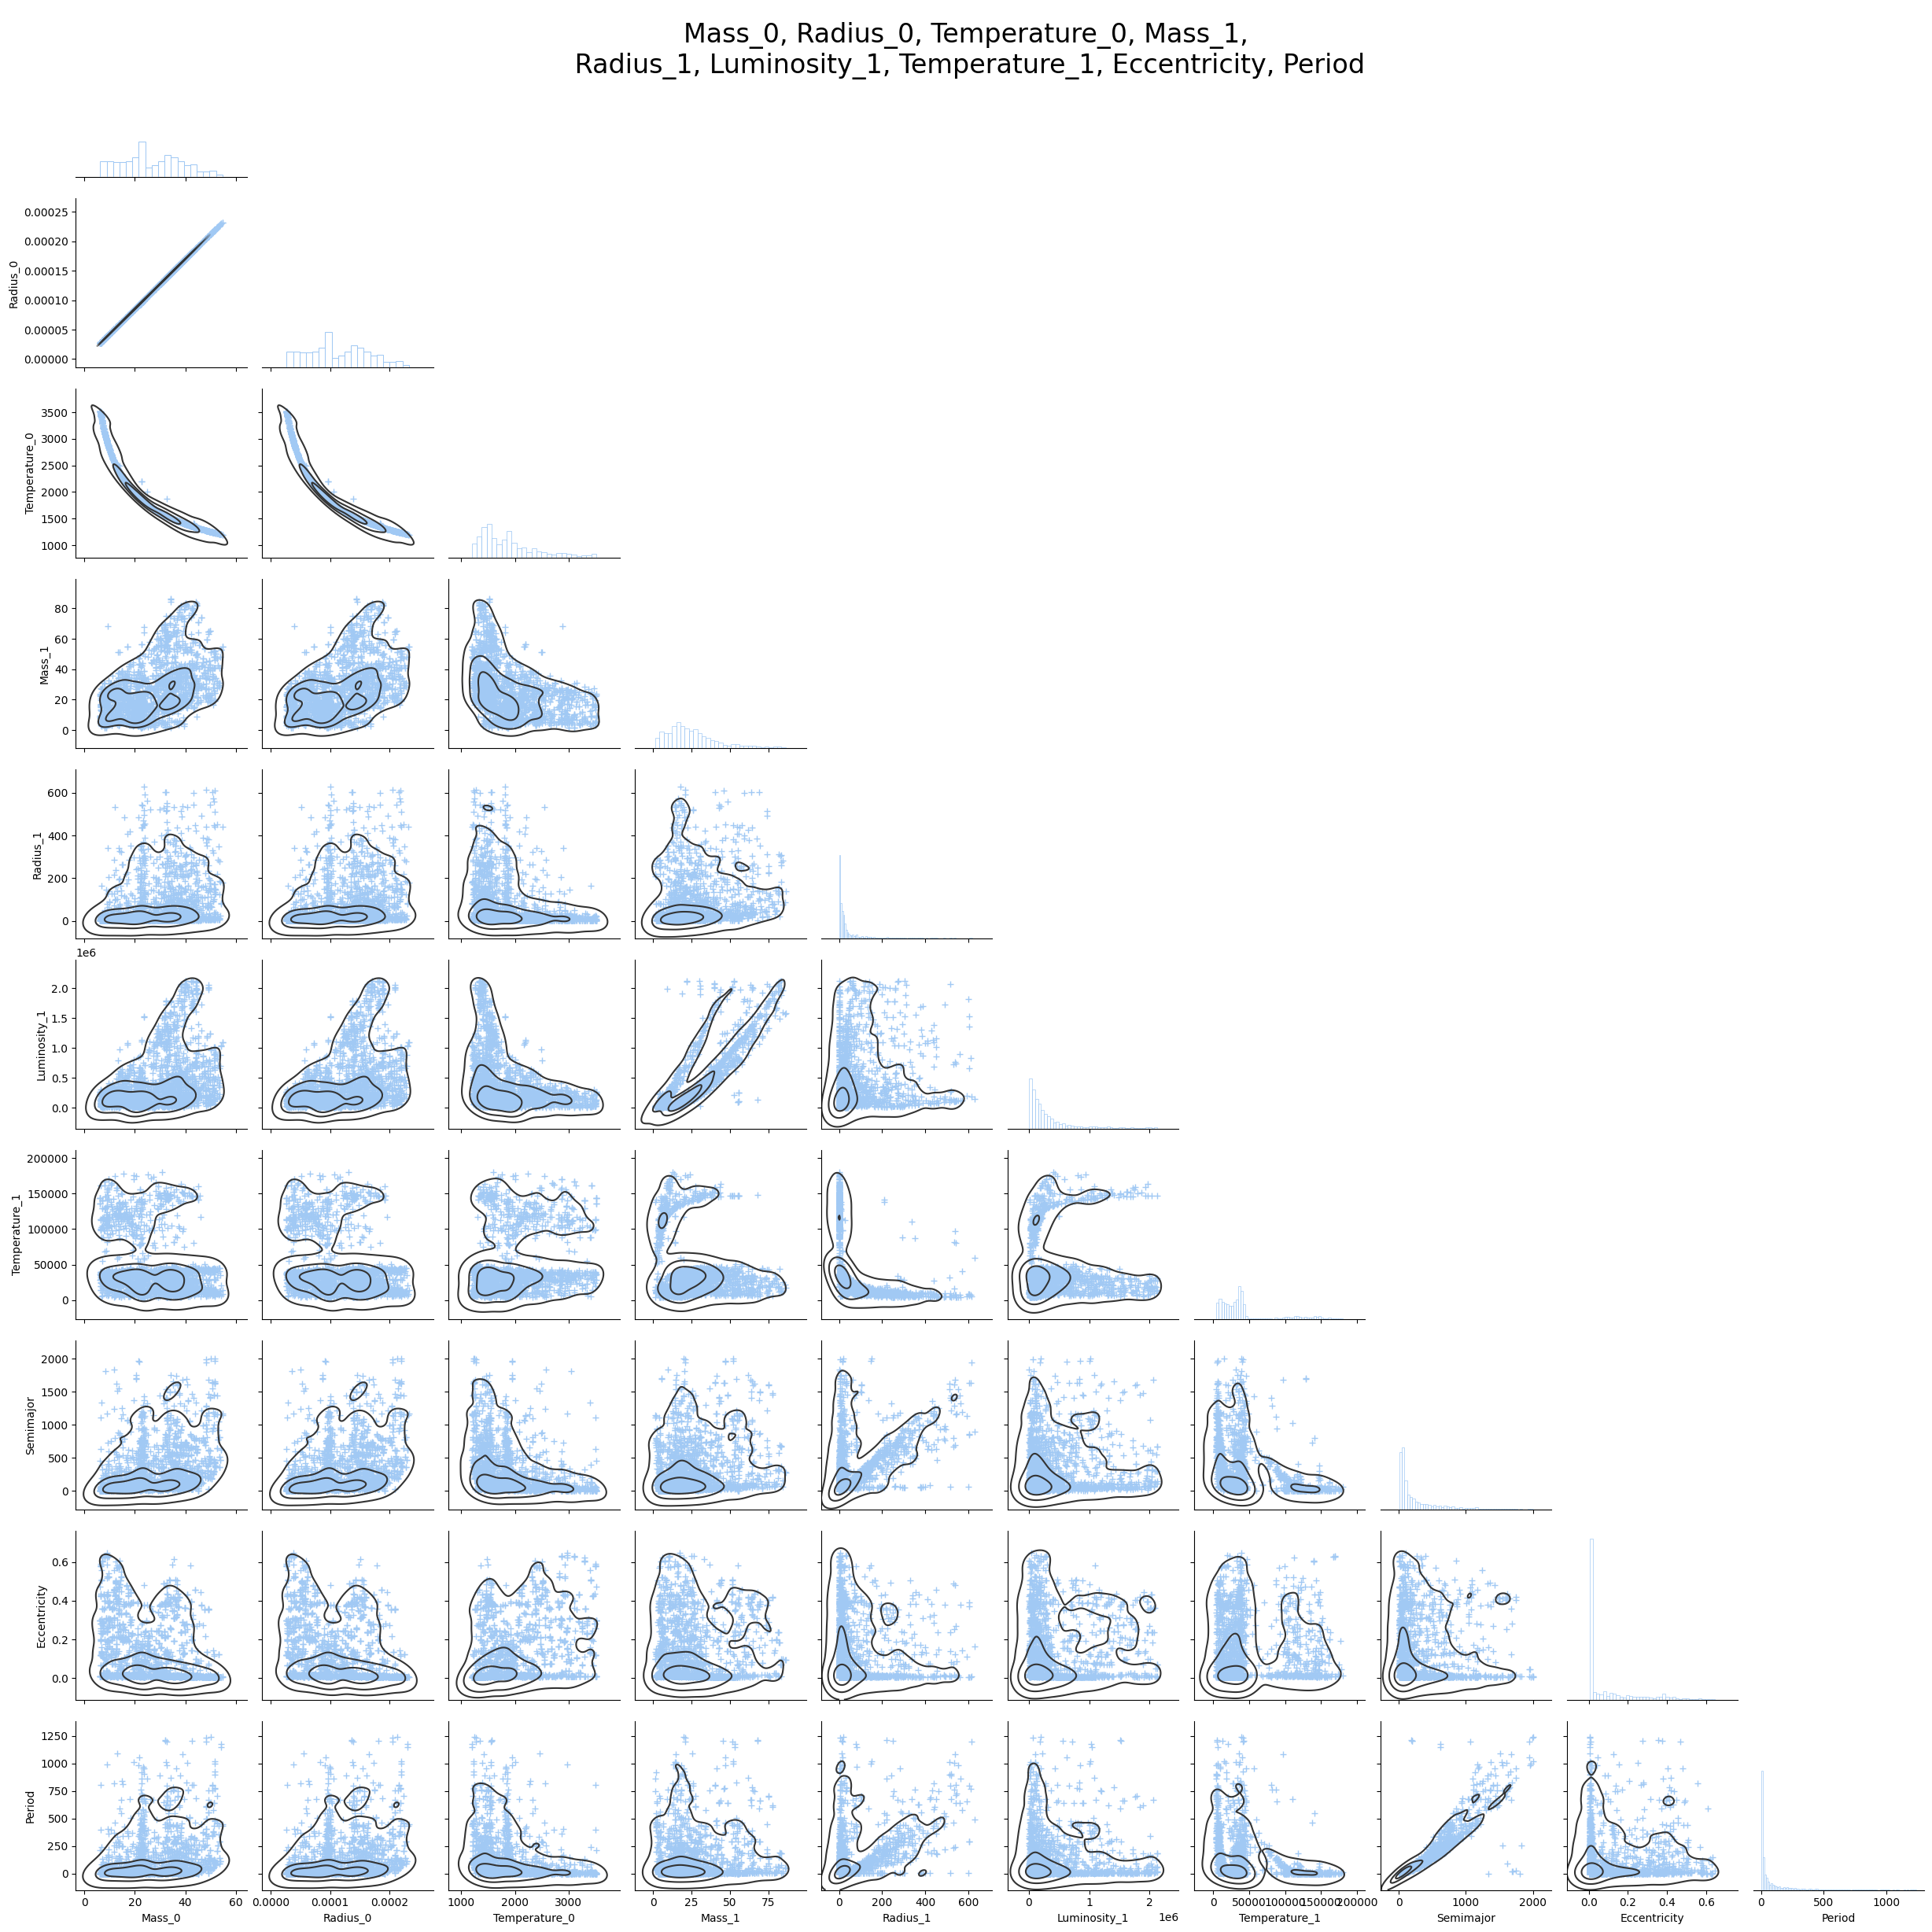

'\n# Create histograms\nint_binsys[cols].hist(figsize=(15,15))\nplt.show()\n'

In [12]:
import seaborn as sn
from scipy import stats
sn.color_palette("pastel")


# Select the relevant columns for analysis

fig = plt.figure(figsize=(20,15))
# Create scatter plot matrix
g = sn.pairplot(df_filtered[cols], diag_kind="hist", corner=True, plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False))
g.map_lower(sn.kdeplot, levels=4, color=".2")

g.fig.suptitle('Mass_0, Radius_0, Temperature_0, Mass_1,\n Radius_1, Luminosity_1, Temperature_1, Eccentricity, Period', size=24)


plt.show()

#g.savefig('.\images\corr_plot', dpi=300)

'''
# Create histograms
int_binsys[cols].hist(figsize=(15,15))
plt.show()
'''

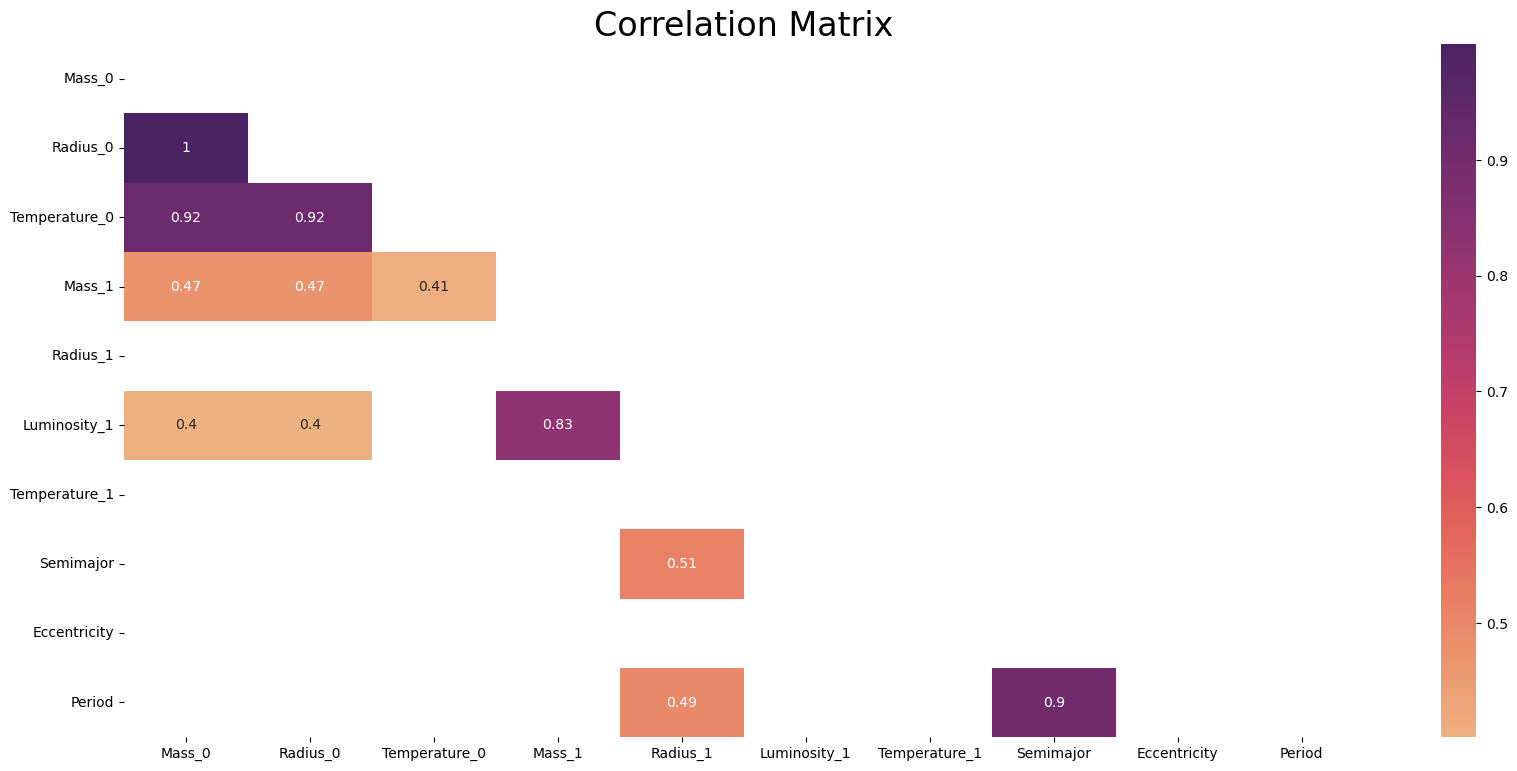

'\n# Add colorbar\ncbar = ax.figure.colorbar(im, ax=ax)\n\n# Set labels\nax.set_xticks(np.arange(len(cols)))\nax.set_yticks(np.arange(len(cols)))\nax.set_xticklabels(cols)\nax.set_yticklabels(cols)\n\n# Rotate x-labels\nplt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")\n\n# Loop over data dimensions and create text annotations\nfor i in range(len(cols)):\n    for j in range(len(cols)):\n        text = ax.text(j, i, round(filtered_corr.iloc[i, j], 2), ha="center", va="center", color="black")\n'

In [194]:
import seaborn as sn

# Calculate correlation matrix
corr_matrix = df_filtered[cols].corr().abs()

filtered_corr = corr_matrix[(corr_matrix >= .4)]

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(20,9))
#im = ax.imshow(filtered_corr, cmap='coolwarm')

matrix = np.triu(filtered_corr)

axx = sn.heatmap(filtered_corr, annot=True, cmap="flare", mask = matrix)
axx.set_title('Correlation Matrix', size=24)

plt.show()
fig.savefig('.\images\corr_matrix', dpi=300)

'''
# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set labels
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)

# Rotate x-labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(j, i, round(filtered_corr.iloc[i, j], 2), ha="center", va="center", color="black")
'''

| Parameter 1 | Parameter 2 | Correlation Coefficient |
| --- | --- | --- |
| Mass_0 | Radius_0 | 1 |
| Semimajor | Period | 0.96 |
| Mass_0 | Temperature_0 | 0.92 |
| Radius_0 | Temperature_0 | 0.92 |
| Mass_1 | Luminosity_1 | 0.87 |
| Semimajor | Radius_1 | 0.55 |
| Period | Radius_1 | 0.52 |
| Eccentricity | Temperature_0 | 0.51 |
| Mass_0 | Mass_1 | 0.48 |
| Radius_0 | Mass_1 | 0.48 |
| Temperature_0 | Mass_1 | 0.42 |
| Eccentricity | Mass_0 | 0.42 |
| Eccentricity | Radius_0 | 0.42 |
| Temperature_1 | Radius_1 | 0.41 |

## Correlation analysis and plot w/ other parameters

In [160]:
# discarding outliers

cols = ['Mass_0', 'Radius_0', 'Mass_1', 'MHE_1', 'MCO_1', 'Radius_1', 'RHE_1', 'RCO_1', 'Semimajor', 'Period']

q_low = int_binsys[cols].quantile(0.01)
q_hi  = int_binsys[cols].quantile(0.99)

df_filtered = int_binsys[(int_binsys[cols] < q_hi) & (int_binsys[cols] > q_low)]

In [165]:
df_filtered = df_filtered[cols].interpolate(method='spline', order=2).dropna()

In [166]:
(df_filtered<0).sum()

Mass_0       0
Radius_0     0
Mass_1       0
MHE_1        0
MCO_1        0
Radius_1     0
RHE_1        0
RCO_1        0
Semimajor    0
Period       0
dtype: int64

<Figure size 2000x1500 with 0 Axes>

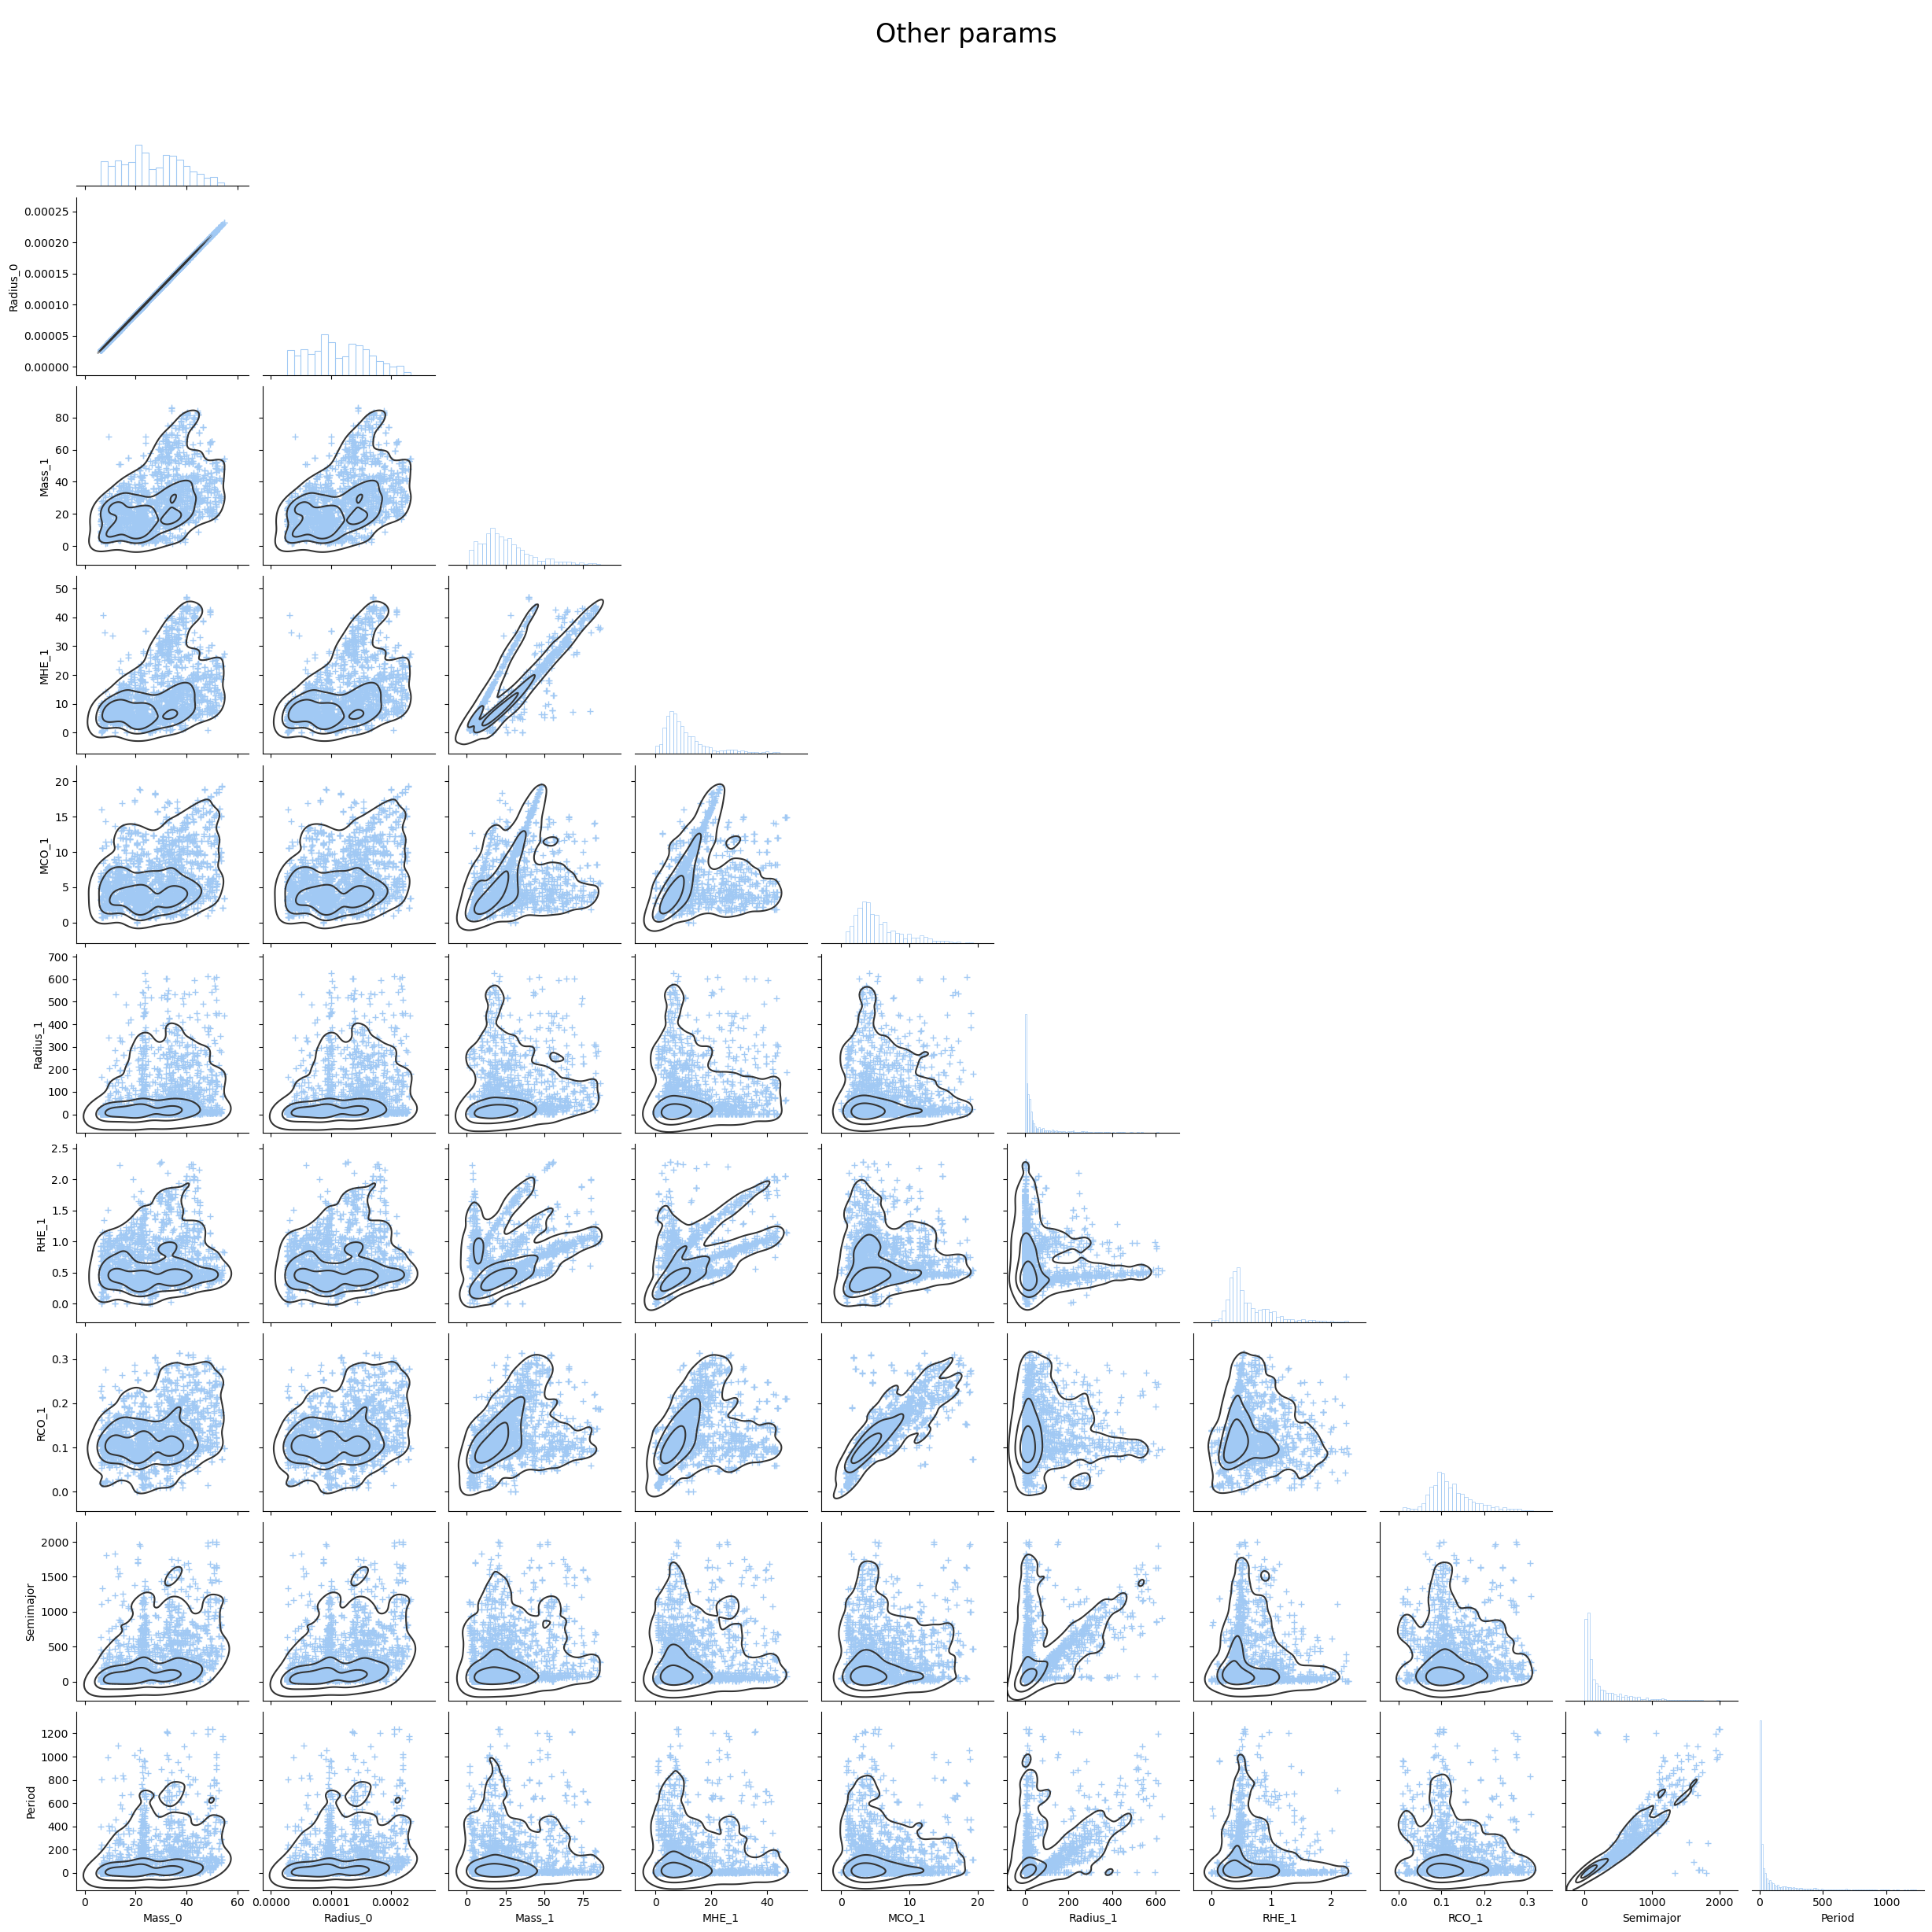

In [167]:
# Select the relevant columns for analysis

fig = plt.figure(figsize=(20,15))
# Create scatter plot matrix
g = sn.pairplot(df_filtered[cols], diag_kind="hist", corner=True, plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False))
g.map_lower(sn.kdeplot, levels=4, color=".2")

g.fig.suptitle('Other params', size=24)


plt.show()

g.savefig('.\images\corr_plot_2', dpi=300)


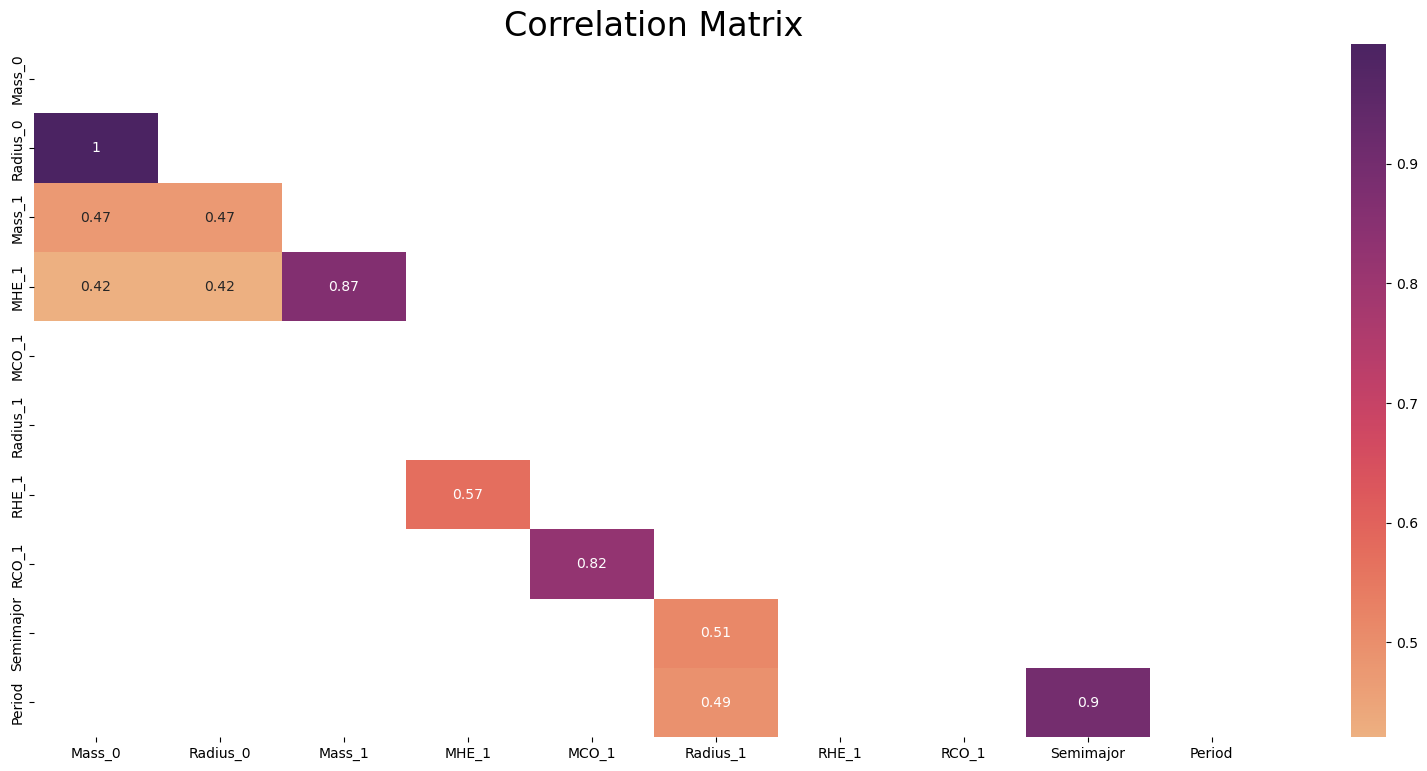

In [168]:
# Calculate correlation matrix
corr_matrix = df_filtered[cols].corr().abs()

filtered_corr = corr_matrix[(corr_matrix >= .4)]

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(20,9))
#im = ax.imshow(filtered_corr, cmap='coolwarm')

matrix = np.triu(filtered_corr)

axx = sn.heatmap(filtered_corr, annot=True, cmap="flare", mask = matrix)
axx.set_title('Correlation Matrix', size=24)

plt.show()
fig.savefig('.\images\corr_matrix_2', dpi=300)

| Parameter 1 | Parameter 2 | Correlation Coefficient |
| --- | --- | --- |
| MCO_1 | MHE_1 | 0.99 |
| RCO_1 | MHE_1 | 0.91 |
| RCO_1 | MCO_1 | 0.90 |
| MHE_1 | Mass_1 | 0.89 |
| RCO_1 | Mass_1 | 0.87 |
| MCO_1 | Mass_1 | 0.84 |
| RHE_1 | MHE_1 | 0.59 |
| MHE_1 | Mass_0 | 0.46 |
| MHE_1 | Radius_0 | 0.46 |
| MCO_1 | Mass_0 | 0.44 |
| MCO_1 | Radius_0 | 0.44 |
| RCO_1 | Mass_0 | 0.43 |
| RCO_1 | Radius_0 | 0.43 |

In [184]:
cols = ['Phase_0', 'PhaseBSE_0', 'RemnantType_0', 'Phase_1', 'PhaseBSE_1', 'RemnantType_1']

int_binsys[cols].isna().sum()

Phase_0          0
PhaseBSE_0       0
RemnantType_0    0
Phase_1          0
PhaseBSE_1       0
RemnantType_1    0
dtype: int64

<Figure size 1500x1000 with 0 Axes>

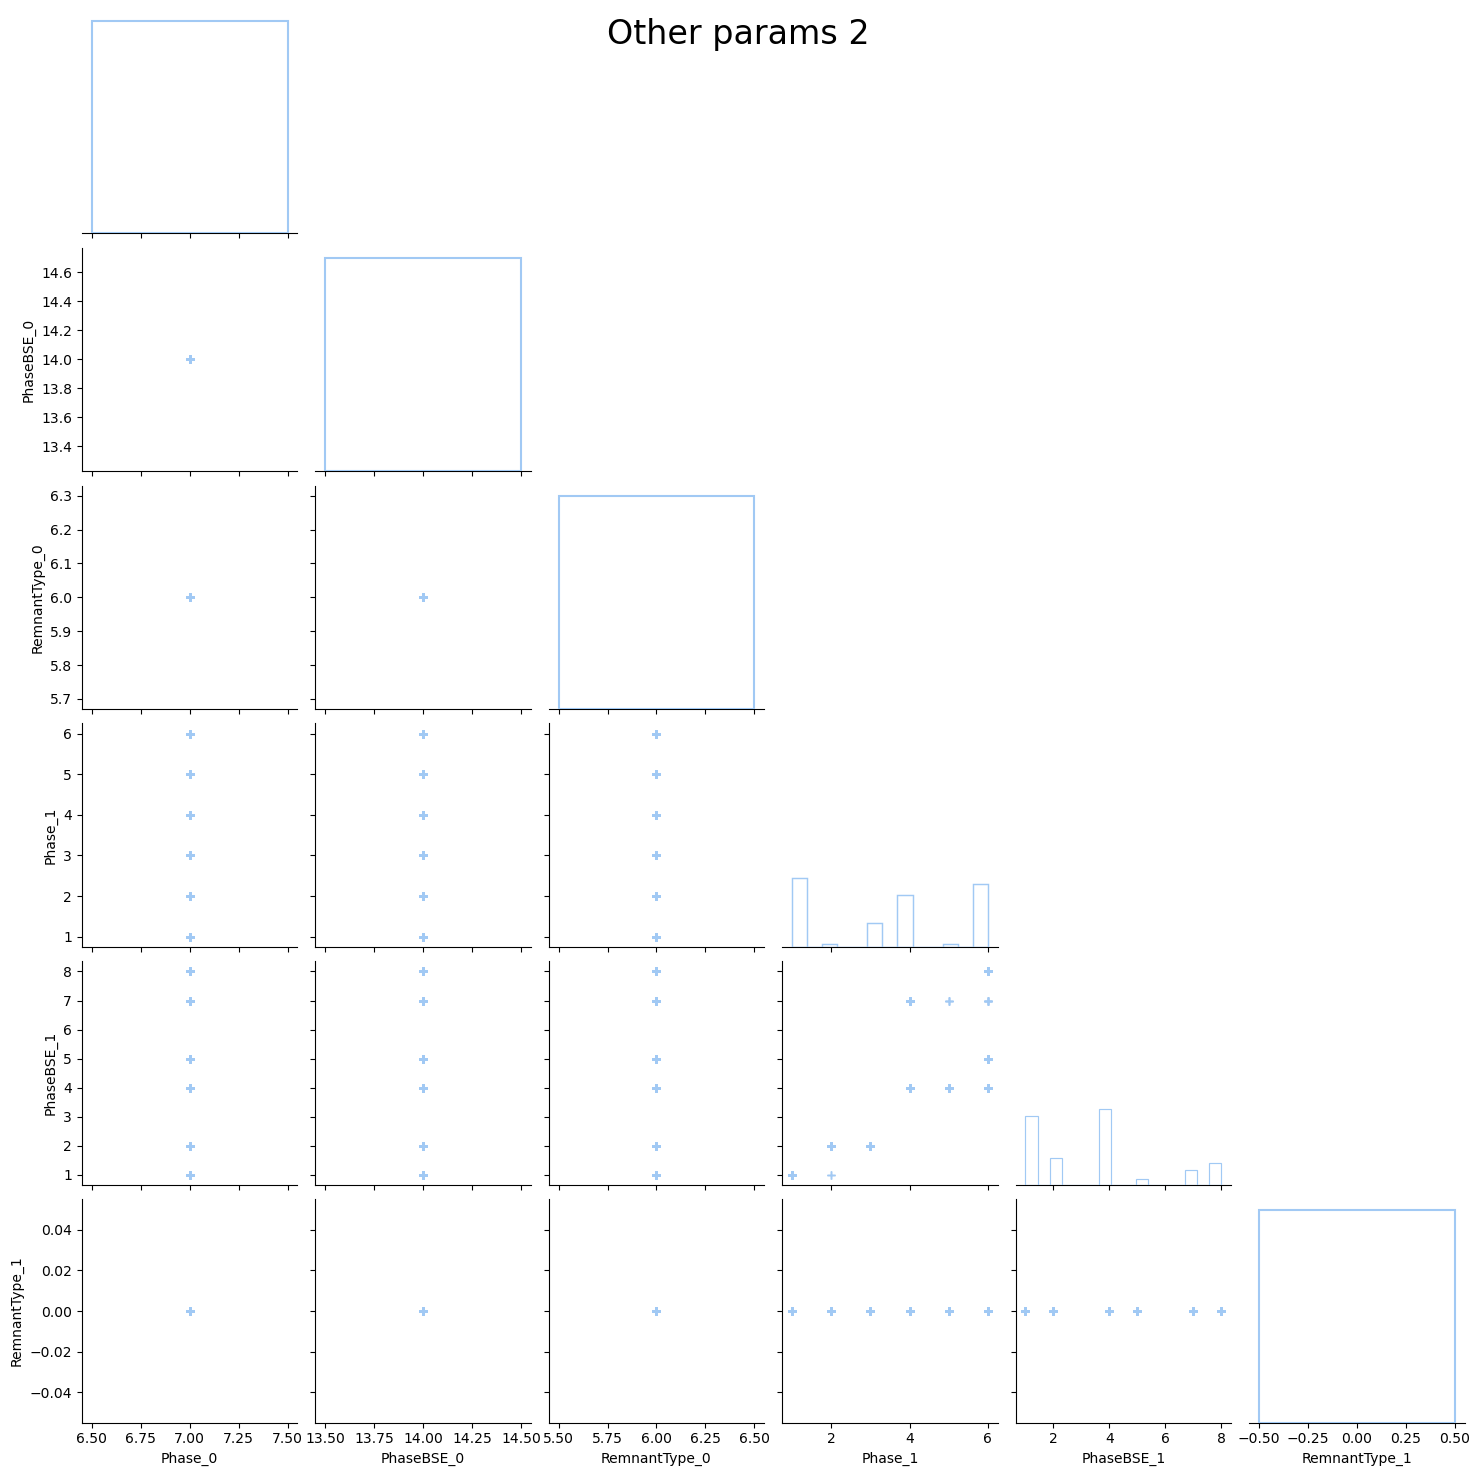

In [16]:
# Select the relevant columns for analysis

fig = plt.figure(figsize=(15,10))
# Create scatter plot matrix
g = sn.pairplot(int_binsys[cols], diag_kind="hist", corner=True, plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False))
#g.map_lower(sn.kdeplot, levels=4, color=".2")

g.fig.suptitle('Other params 2', size=24)


plt.show()

g.savefig('.\images\corr_plot_3', dpi=300)

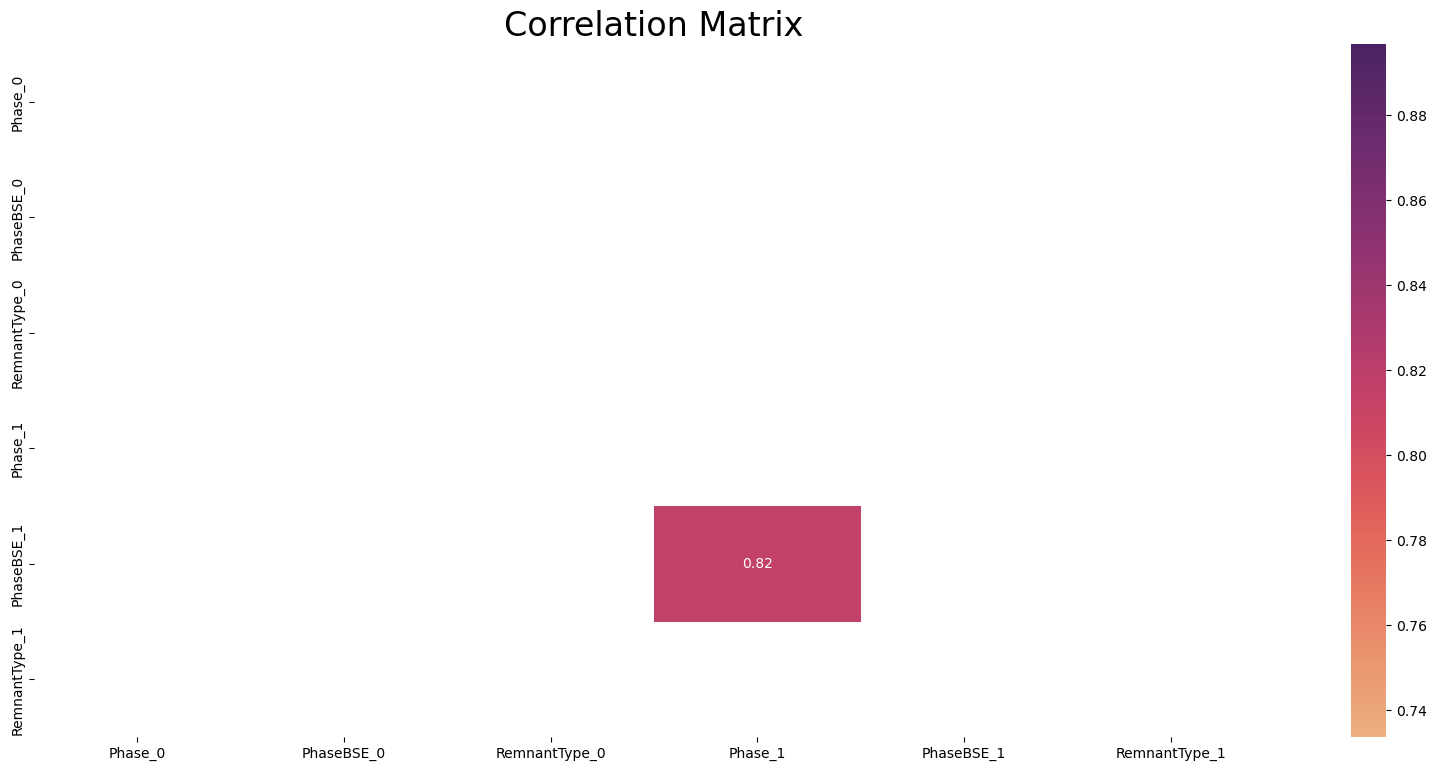

In [17]:
# Calculate correlation matrix
corr_matrix = int_binsys[cols].corr().abs()

filtered_corr = corr_matrix[(corr_matrix >= .4)]

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(20,9))
#im = ax.imshow(filtered_corr, cmap='coolwarm')

matrix = np.triu(filtered_corr)

axx = sn.heatmap(filtered_corr, annot=True, cmap="flare", mask = matrix)
axx.set_title('Correlation Matrix', size=24)

plt.show()
fig.savefig('.\images\corr_matrix_3', dpi=300)

| Parameter 1 | Parameter 2 | Correlation Coefficient |
|----|----|----|
| PhaseBSE_1 | Phase_1 | 0.82 |

_____________________________________________________________________

In [14]:
data_clean = int_binsys.drop(columns=['ID', 'name', 'Lambda_0', 'Lambda_1', 'GWtime', 'BWorldtime'])

cols_params = ['Mass_0', 'Radius_0', 'Temperature_0', 'Zams_0', 'Mass_1', 'MHE_1', 'MCO_1', 'Radius_1', 'RHE_1', 'RCO_1', 'Luminosity_1', 'Temperature_1', 'Zams_1', 'Semimajor', 'Eccentricity', 'Period']
#no R/MCO/HE_0 cause they'r 0

#'Luminosity_0', 'RHE_0', 'RCO_0', 'MHE_0', 'MCO_0' -> don't contribute to anything

cols_phase = ['Phase_0', 'PhaseBSE_0', 'RemnantType_0', 'Phase_1', 'PhaseBSE_1', 'RemnantType_1', 'BEvent']

q_low = data_clean[cols_params].quantile(0.0027)
q_hi  = data_clean[cols_params].quantile(0.9973)

df_params_filt = data_clean[(data_clean[cols_params] < q_hi) & (data_clean[cols_params] > q_low)][cols_params]
df_params = df_params_filt[cols_params].interpolate(method='piecewise_polynomial', order=2).dropna()[cols_params]

df_phase = data_clean[cols_phase][cols_phase]

df_result = pd.concat([df_params, df_phase], axis=1)
df_result = df_result.iloc[:-3]

<Figure size 2000x1500 with 0 Axes>

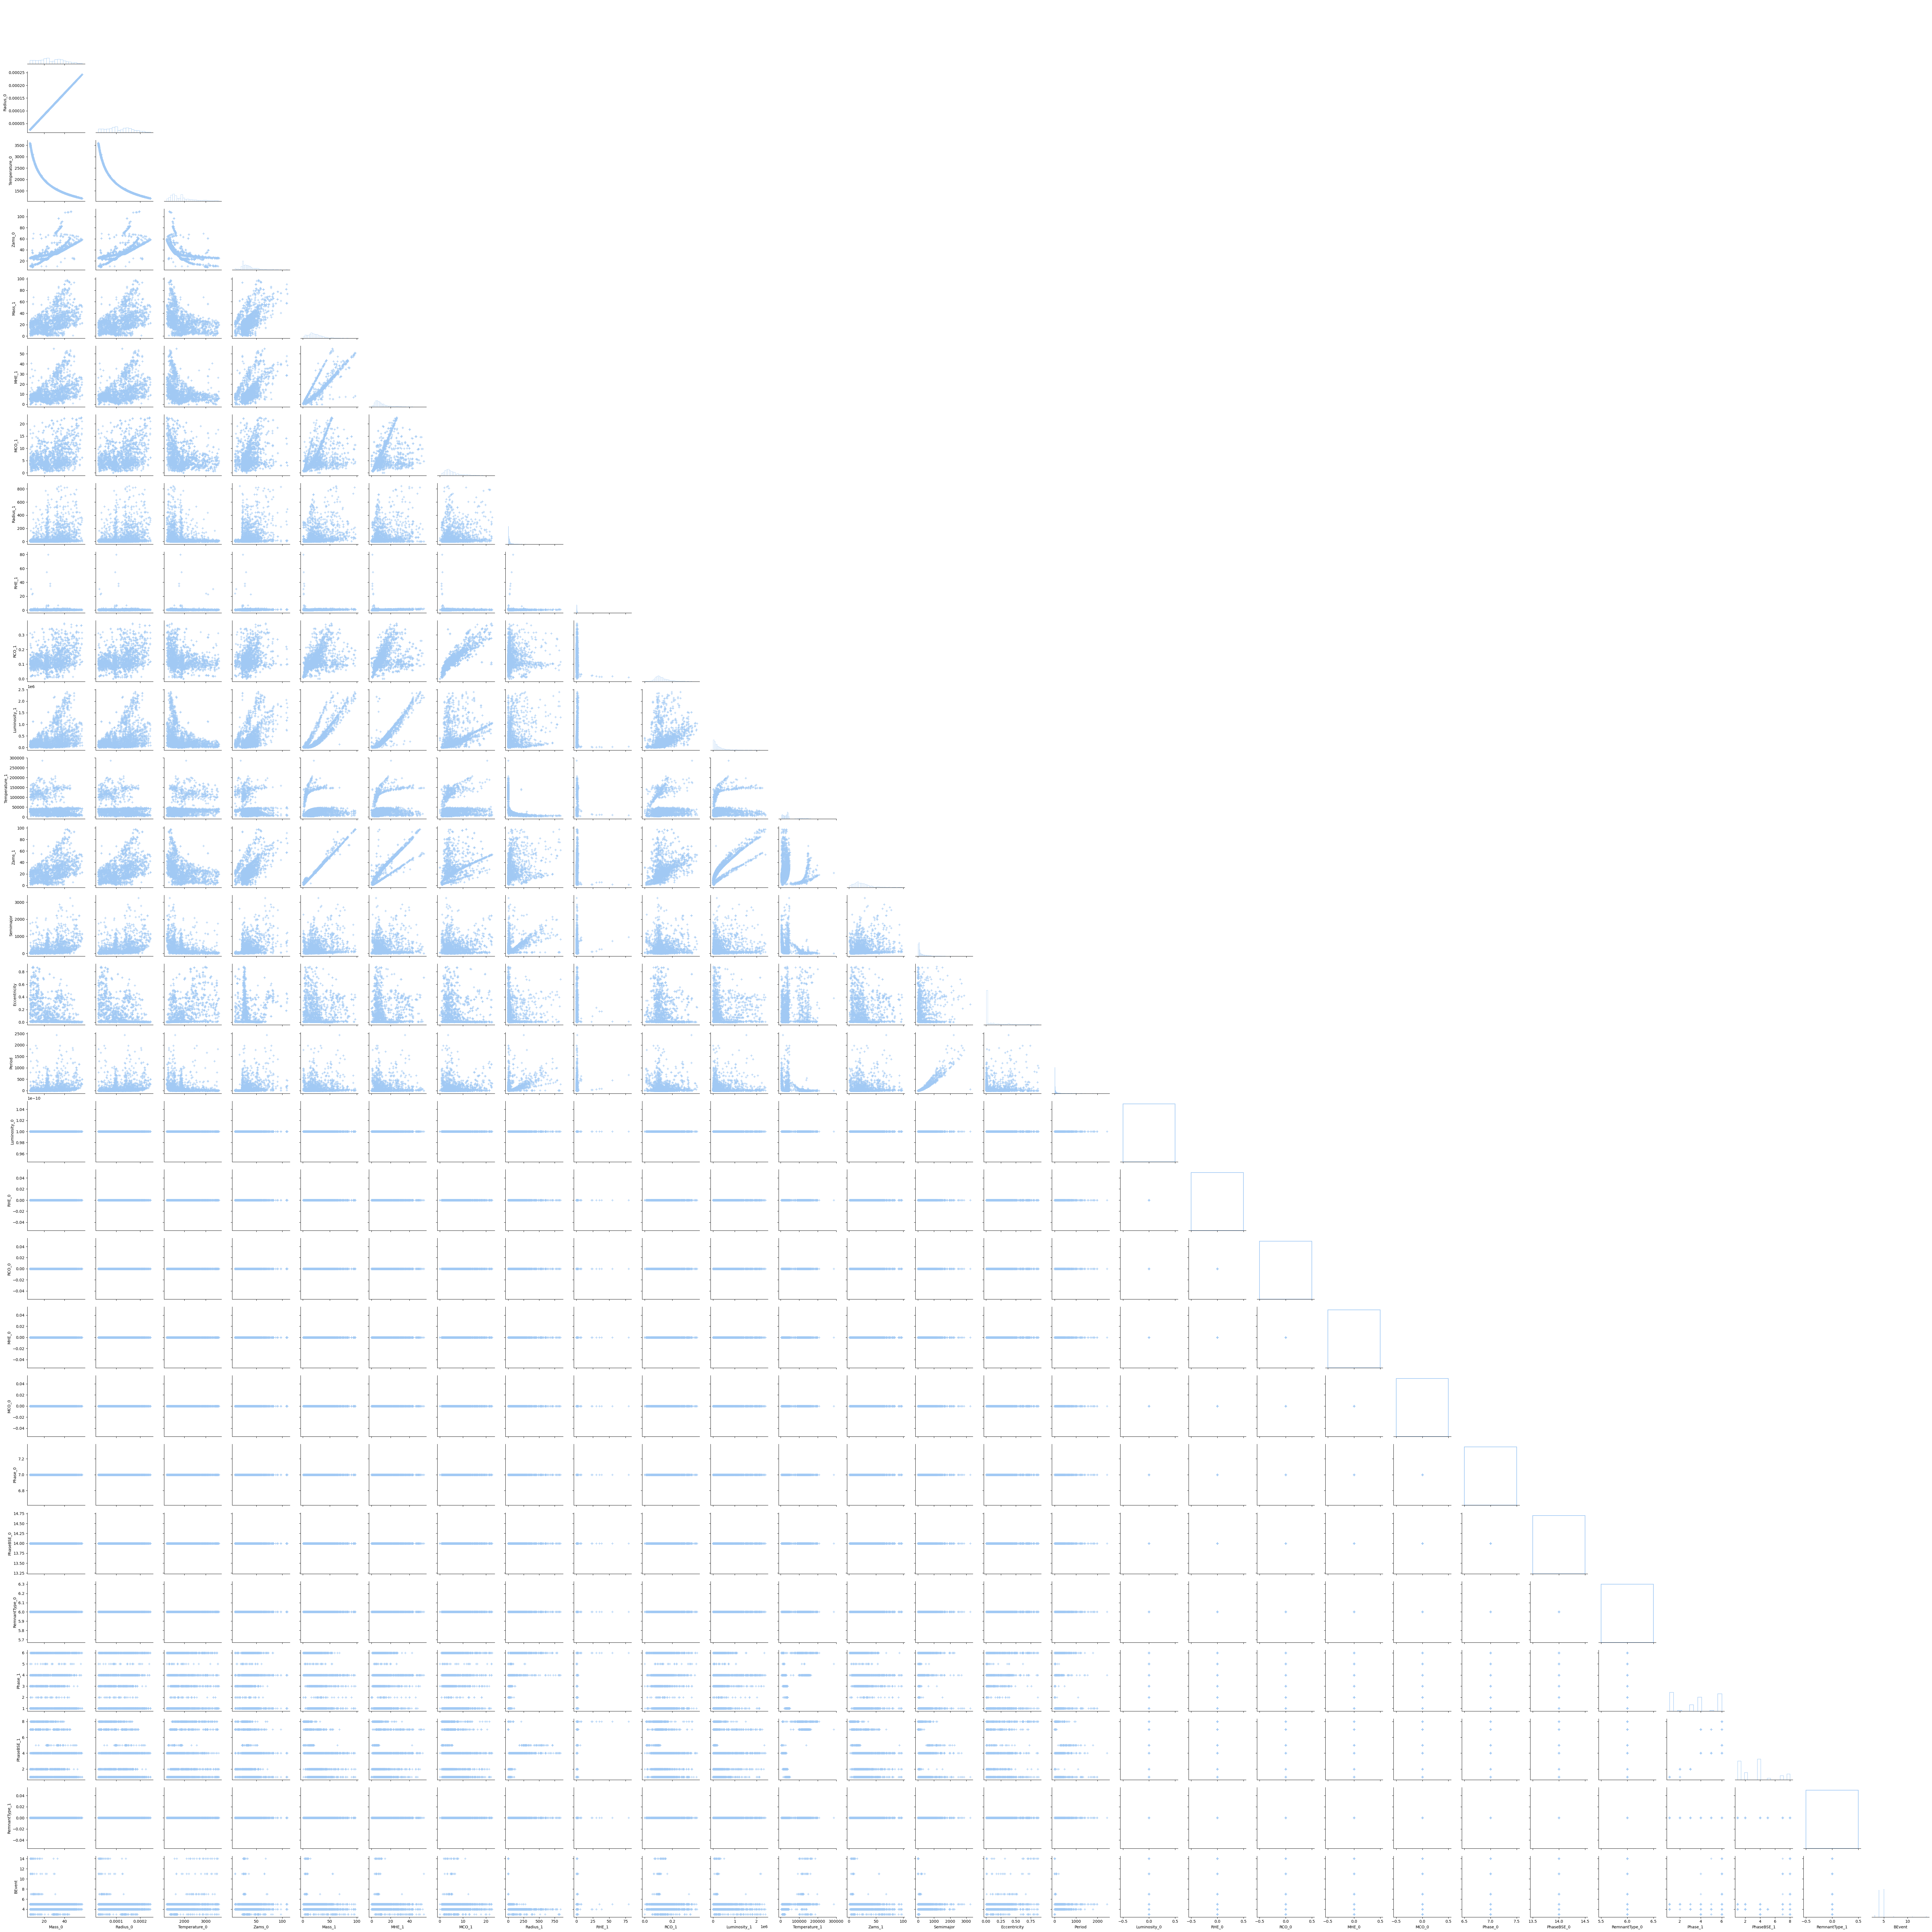

In [17]:
# Select the relevant columns for analysis

fig = plt.figure(figsize=(20,15))
# Create scatter plot matrix
g = sn.pairplot(df_result, diag_kind="hist", corner=True, plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False))
#g.map_lower(sn.kdeplot, levels=4, color=".2")

#g.fig.suptitle('Mass_0, Radius_0, Temperature_0, Mass_1,\n Radius_1, Luminosity_1, Temperature_1, Eccentricity, Period', size=24)
g.savefig('.\images\pairplot_tot_2.png', dpi=300)

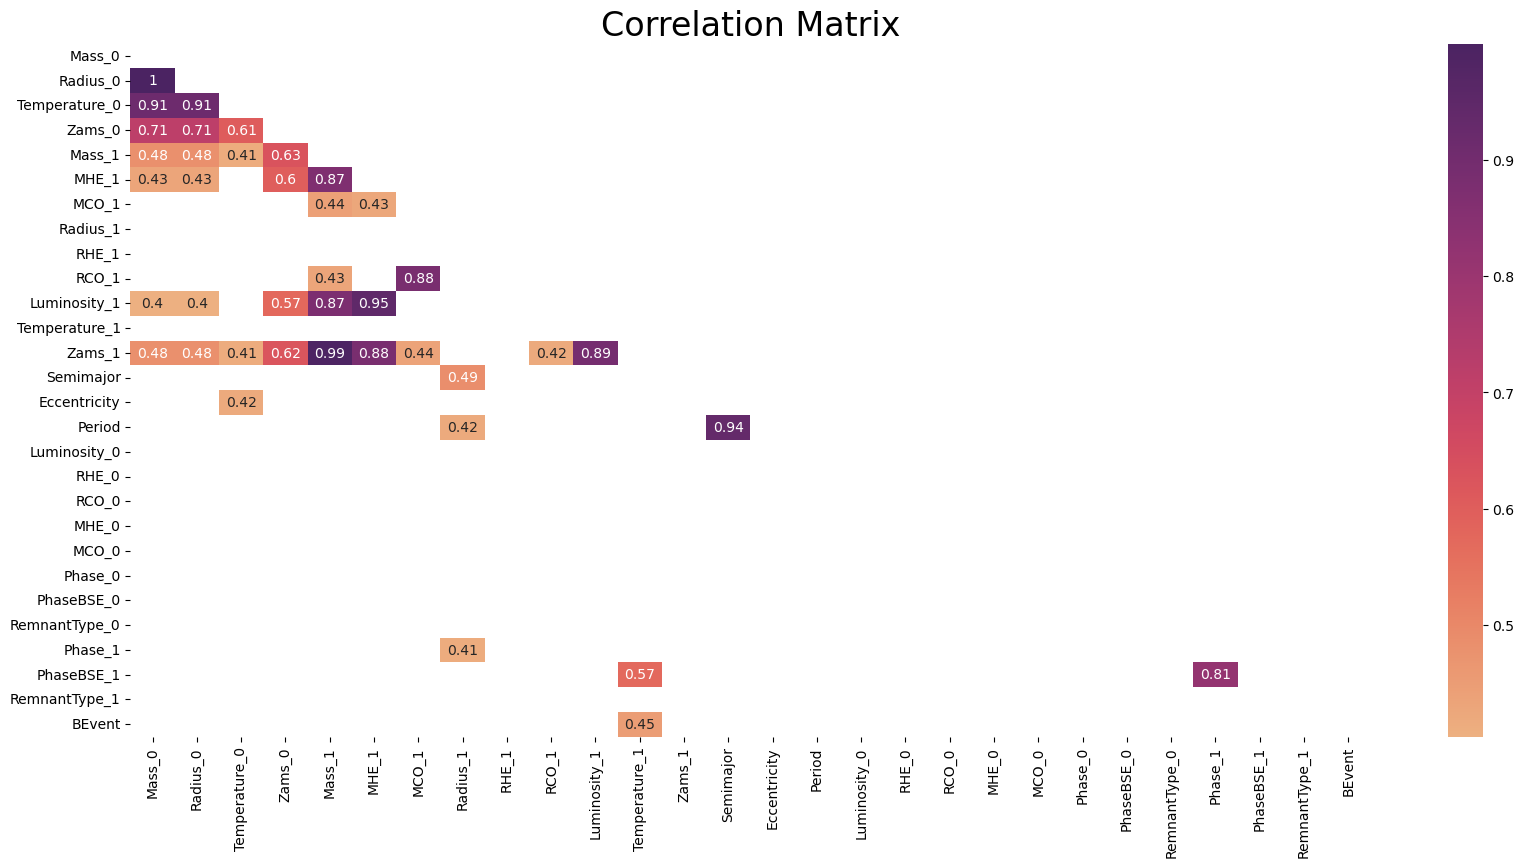

In [18]:
# Calculate correlation matrix
corr_matrix = df_result.corr().abs()

filtered_corr = corr_matrix[(corr_matrix >= .4)]

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(20,9))
#im = ax.imshow(filtered_corr, cmap='coolwarm')

matrix = np.triu(filtered_corr)

axx = sn.heatmap(filtered_corr, annot=True, cmap="flare", mask = matrix)
axx.set_title('Correlation Matrix', size=24)

fig.savefig('.\images\corr_matrix_tot_2.png', dpi=300)

From the correlation matrix it can be seen that the parameters that correlates, at least 40%, with eachother are:
`'Mass_0', 'Radius_0', 'Temperature_0', 'Zams_0', 'Mass_1', 'MHE_1', 'MCO_1', 'RCO_1', 'Luminosity_1', 'Zams_1', 'Semimajor', 'Radius_1', 'Eccentricity', 'Period', 'Phase_1', 'PhaseBSE_1', 'Temperature_1', 'BEvent'`

What done till now:

I preprocessed the data as described in the pdf. 

Limiting the analysis to the iteracting systems `int_binsys`, I selected some random features and i plotted in a pairplot and
in a correlation matrix. I noticed that there were some outliers that could mislead the analysis, so i removed them (considering a quantile "of 3$\sigma$"). 
I also noticed that the database cleaned of outliers contained many NaN values: 
- The evolutionary phase columns were NaN-only (for obvious reasons, since they are integers encoding the various phases);
- The `'Luminosity_0', 'RHE_0', 'RCO_0', 'MHE_0', 'MCO_0'` were NaN-only beacause the values were 0 or 10e-10, and the quintile method rejected 'em;
- Some NaN values were spread across the other columns. I could not delete the rows for those values, because I would have compromised the statistical analysis.

I then proceeded to replace the NaNs of the columns in the last point. There are several methods to do this: one of them is to replace them with the mean value, but this is not recommended because it would have changed the variance of the data a lot. I tried various interpolation methods and after seeing that some of them returned negative values ("non-physical" values), I used the method that interpolating returned only positive values.

I then created a new database `df_result` consisting of two "pre-databases."
- `df_params` containing the parameter values that I could interpolate, after removing the outliers.
- `df_phase` containing the values for the evolutionary phase parameters (not interpolated and without removing outliers)

In `df_phase` I also tried putting `'Luminosity_0', 'RHE_0', 'RCO_0', 'MHE_0', 'MCO_0'`, but they did not correlate with any parameters and the pairplots gave no information.

The result found so far is that the parameters that correlate with each other by at least 40% (the threshold can be higher) are: `'Mass_0', 'Radius_0', 'Temperature_0', 'Zams_0', 'Mass_1', 'MHE_1', 'MCO_1', 'RCO_1', 'Luminosity_1', 'Zams_1', 'Semimajor', 'Radius_1', 'Eccentricity', 'Period', 'Phase_1', 'PhaseBSE_1', 'Temperature_1', 'BEvent'`. 

# Feature selection

The idea now is to use `df_result` by selecting only the columns related to the best-correlating parameters.  
I want to select the most relevant, statistically speaking, features >>> unsupervised feature selection using PCA and clustering

In [15]:
cols = ['Mass_0', 'Radius_0', 'Temperature_0', 'Zams_0', 'Mass_1', 'MHE_1', 'MCO_1', 'RCO_1', 'Luminosity_1', 'Zams_1', 'Semimajor', 'Radius_1', 'Eccentricity', 'Period', 'Phase_1', 'PhaseBSE_1', 'Temperature_1', 'BEvent']

df_clean = df_result[cols][cols]

### PCA and clustering

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(df_clean)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(data)

# Use the silhouette score to determine the optimal number of clusters
max_clusters = 18
silhouette_scores = []
for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    labels = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    silhouette_scores.append(score)

# Choose the number of clusters with the highest silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
labels = kmeans.fit_predict(pca_data)

# Get the indices of the top features for each cluster
feature_indices = []
for i in range(optimal_clusters):
    cluster_data = pca_data[labels == i]
    centroid = np.mean(cluster_data, axis=0)
    feature_indices.append(np.argsort(-centroid)[:3])

# Print the names of the top features for each cluster
for i, indices in enumerate(feature_indices):
    print(f"Cluster {i+1}: {df_clean[cols].columns[indices].tolist()}")

Cluster 1: ['Radius_0', 'Zams_0', 'MCO_1']
Cluster 2: ['Mass_0', 'Mass_1', 'Temperature_0']


- **Cluster 1/2**: This cluster is characterized by high values of `Mass_0`, `Mass_1`, and `Temperature_0`. These features are related to the masses and temperatures of the objects in the system, which suggests that this cluster may represent systems with high-mass objects and high temperatures. 
- **Cluster 2/1** : This cluster is characterized by high values of `Radius_0`, `Zams_0`, and `MCO_1`. These features are related to systems where the object `0` has a large initial radius, large ZAMS mass and the object `1` has a large mass of the CO core. 

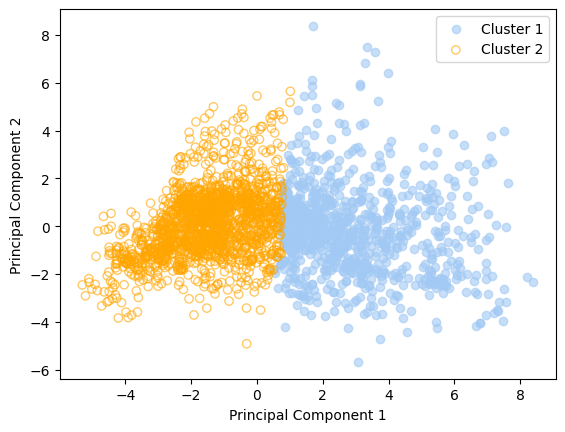

In [17]:
cluster1_data = pca_data[labels == 0]
cluster2_data = pca_data[labels == 1]

plt.scatter(cluster1_data[:, 0], cluster1_data[:, 1], label='Cluster 1', alpha=0.6)
plt.scatter(cluster2_data[:, 0], cluster2_data[:, 1], label='Cluster 2', facecolors='none', edgecolor='orange', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


## I DON'T KNOW IF THE PLOT HAS ANY MEANING

### t-SNE and clustering

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: ['Mass_0', 'Radius_0']
Cluster 2: ['Radius_0', 'Mass_0']


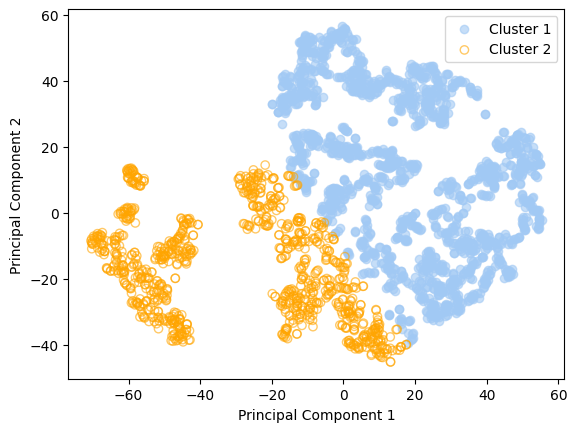

'# Print the number of samples in each cluster\nfor i in range(optimal_clusters):\n    print(f"Cluster {i+1}: {df_clean[cols].columns[indices].tolist()}")'

In [36]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(df_clean[cols])

# Determine the optimal number of components for t-SNE
tsne_scores = []
max_components = 3
for n_components in range(1, max_components+1):
    tsne = TSNE(n_components=n_components)
    tsne_data = tsne.fit_transform(data)
    score = silhouette_score(tsne_data, KMeans().fit_predict(tsne_data))
    tsne_scores.append(score)

# Choose the number of components with the highest silhouette score
optimal_components = np.argmax(tsne_scores) + 2

# Perform t-SNE with the optimal number of components
tsne = TSNE(n_components=optimal_components)
tsne_data = tsne.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
inertias = []
max_clusters = 9
for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(tsne_data)
    inertias.append(kmeans.inertia_)
#plt.plot(range(1, max_clusters+1), inertias, marker='o')
#plt.xlabel('Number of clusters')
#plt.ylabel('Inertia')
#plt.show()

# Choose the number of clusters with the elbow in the plot
optimal_clusters = np.argmax(inertias) + 2

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
labels = kmeans.fit_predict(tsne_data)

# Get the indices of the top features for each cluster
feature_indices = []
for i in range(optimal_clusters):
    cluster_data = tsne_data[labels == i]
    centroid = np.mean(cluster_data, axis=0)
    feature_indices.append(np.argsort(-centroid)[:3])

# Print the names of the top features for each cluster
for i, indices in enumerate(feature_indices):
    print(f"Cluster {i+1}: {df_clean[cols].columns[indices].tolist()}")

# Visualize the clusters using a scatter plot
cluster1_data = tsne_data[labels == 0]
cluster2_data = tsne_data[labels == 1]

plt.scatter(cluster1_data[:, 0], cluster1_data[:, 1], label='Cluster 1', alpha=0.6)
plt.scatter(cluster2_data[:, 0], cluster2_data[:, 1], label='Cluster 2', facecolors='none', edgecolor='orange', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

'''# Print the number of samples in each cluster
for i in range(optimal_clusters):
    print(f"Cluster {i+1}: {df_clean[cols].columns[indices].tolist()}")'''

# Trashcan

In [83]:
#cols = ['Mass_0', 'Radius_0', 'Semimajor', 'Period', 'Temperature_0', 'Mass_1', 'Luminosity_1', 'Radius_1', 'Eccentricity', 'MCO_1', 'MHE_1', 'RCO_1', 'RHE_1']
cols_phase = ['Mass_0', 'Radius_0', 'Semimajor', 'Period', 'Temperature_0', 'Mass_1', 'Luminosity_1', 'Radius_1', 'Eccentricity', 'MCO_1', 'MHE_1', 'RCO_1', 'RHE_1', 'Phase_1', 'PhaseBSE_1']

# removing ouliers 3sigma
q_low = int_binsys[cols_phase].quantile(0.0001)
q_hi  = int_binsys[cols_phase].quantile(0.9999)

df_filtered = int_binsys[(int_binsys[cols_phase] < q_hi) & (int_binsys[cols_phase] > q_low)]

In [84]:
df_filtered[cols_phase]

Mass_0  Radius_0   Semimajor     Period  Temperature_0     Mass_1  \
342     11.84276  0.000050  215.612900  71.051404       2574.311  14.799160   
348     11.84282  0.000050    2.563924   0.115101       2574.304   5.227696   
349     11.84282  0.000050    2.563924   0.115101       2574.304   5.227696   
350     11.84363  0.000050    2.578426   0.116089       2574.216   5.223911   
738     29.04406  0.000123   56.314010   6.388708       1643.837  29.665640   
...          ...       ...         ...        ...            ...        ...   
456919  48.97372  0.000208  227.125900  42.219784       1265.919  39.223440   
458390  32.05102  0.000136  185.022400  39.007697       1564.828  23.803580   
458396  32.05156  0.000136  183.229400  38.445544       1564.815  23.792900   
458427  19.37343  0.000082   47.578340   5.830976       2012.724  23.130780   
458430  19.37374  0.000082   49.016380   6.097537       2012.708  23.127490   

        Luminosity_1   Radius_1  Eccentricity      MCO_1      MHE_1     RCO_1  \
342         29863.45   4.174858      0.826074        NaN        NaN       NaN   
348         61630.87   0.472950           NaN   3.108715   5.227696  0.115060   
349         61630.87   0.472950           NaN   3.108715   5.227696  0.115060   
350         95129.71   0.837480           NaN   3.135747   5.223911  0.089983   
738        252289.40  11.264870      0.008516        NaN        NaN       NaN   
...              ...        ...           ...        ...        ...       ...   
456919     622085.90  84.999230           NaN  14.247270  17.793240  0.290958   
458390     133466.10   7.436695      0.008952        NaN        NaN       NaN   
458396     240438.30  66.072350           NaN   6.589542   9.362646  0.163713   
458427     143694.90   9.491201      0.011764        NaN        NaN       NaN   
458430     203999.20  20.161960           NaN        NaN   7.629009       NaN   

           RHE_1  Phase_1  PhaseBSE_1  
342          NaN      NaN         NaN  
348     0.472950      NaN         NaN  
349     0.472950      NaN         NaN  
350     0.837480      NaN         NaN  
738          NaN      NaN         NaN  
...          ...      ...         ...  
456919  0.510545      NaN         4.0  
458390       NaN      NaN         NaN  
458396  0.367405      NaN         4.0  
458427       NaN      NaN         NaN  
458430  0.425134      3.0         2.0  

[2532 rows x 15 columns]

In [85]:
cols_phase = ['Mass_0', 'Radius_0', 'Semimajor', 'Period', 'Temperature_0', 'Mass_1', 'Luminosity_1', 'Radius_1', 'Eccentricity', 'MCO_1', 'MHE_1', 'RCO_1', 'RHE_1', 'Phase_1', 'PhaseBSE_1']

df_filtered[cols_phase].isna().sum()

Mass_0              2
Radius_0            2
Semimajor           2
Period              2
Temperature_0       2
Mass_1              2
Luminosity_1        2
Radius_1            2
Eccentricity     1752
MCO_1            1747
MHE_1             816
RCO_1            1747
RHE_1             816
Phase_1          1569
PhaseBSE_1       1074
dtype: int64

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data into a pandas DataFrame
# Select the relevant columns for analysis
cols = ['Mass_0', 'Radius_0', 'Semimajor', 'Period', 'Temperature_0', 'Mass_1', 'Luminosity_1', 'Radius_1', 'Eccentricity', 'MCO_1', 'MHE_1', 'RCO_1', 'RHE_1']
#cols = ['Mass_0', 'Radius_0', 'Semimajor', 'Period', 'Temperature_0', 'Mass_1', 'Luminosity_1', 'Radius_1', 'Eccentricity', 'MCO_1', 'MHE_1', 'RCO_1', 'RHE_1', 'Phase_1', 'PhaseBSE_1']
# removing ouliers 3sigma
q_low = int_binsys[cols].quantile(0.0027)
q_hi  = int_binsys[cols].quantile(0.9973)

df_filtered = int_binsys[(int_binsys[cols] < q_hi) & (int_binsys[cols] > q_low)]

data_clean = df_filtered[cols].fillna(0) # fill NaN with 0. is it fair o it's better to delete the rows?

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data_clean)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(data)

# Use the silhouette score to determine the optimal number of clusters
max_clusters = 15
silhouette_scores = []
for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    labels = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    silhouette_scores.append(score)

# Choose the number of clusters with the highest silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
labels = kmeans.fit_predict(pca_data)

# Get the indices of the top features for each cluster
feature_indices = []
for i in range(optimal_clusters):
    cluster_data = pca_data[labels == i]
    centroid = np.mean(cluster_data, axis=0)
    feature_indices.append(np.argsort(-centroid)[:3])

# Print the names of the top features for each cluster
for i, indices in enumerate(feature_indices):
    print(f"Cluster {i+1}: {data_clean[cols].columns[indices].tolist()}")
    

Cluster 1: ['Semimajor', 'Temperature_0', 'Radius_1']
Cluster 2: ['Mass_0', 'Radius_0', 'Mass_1']
Cluster 3: ['Mass_0', 'Period', 'Semimajor']


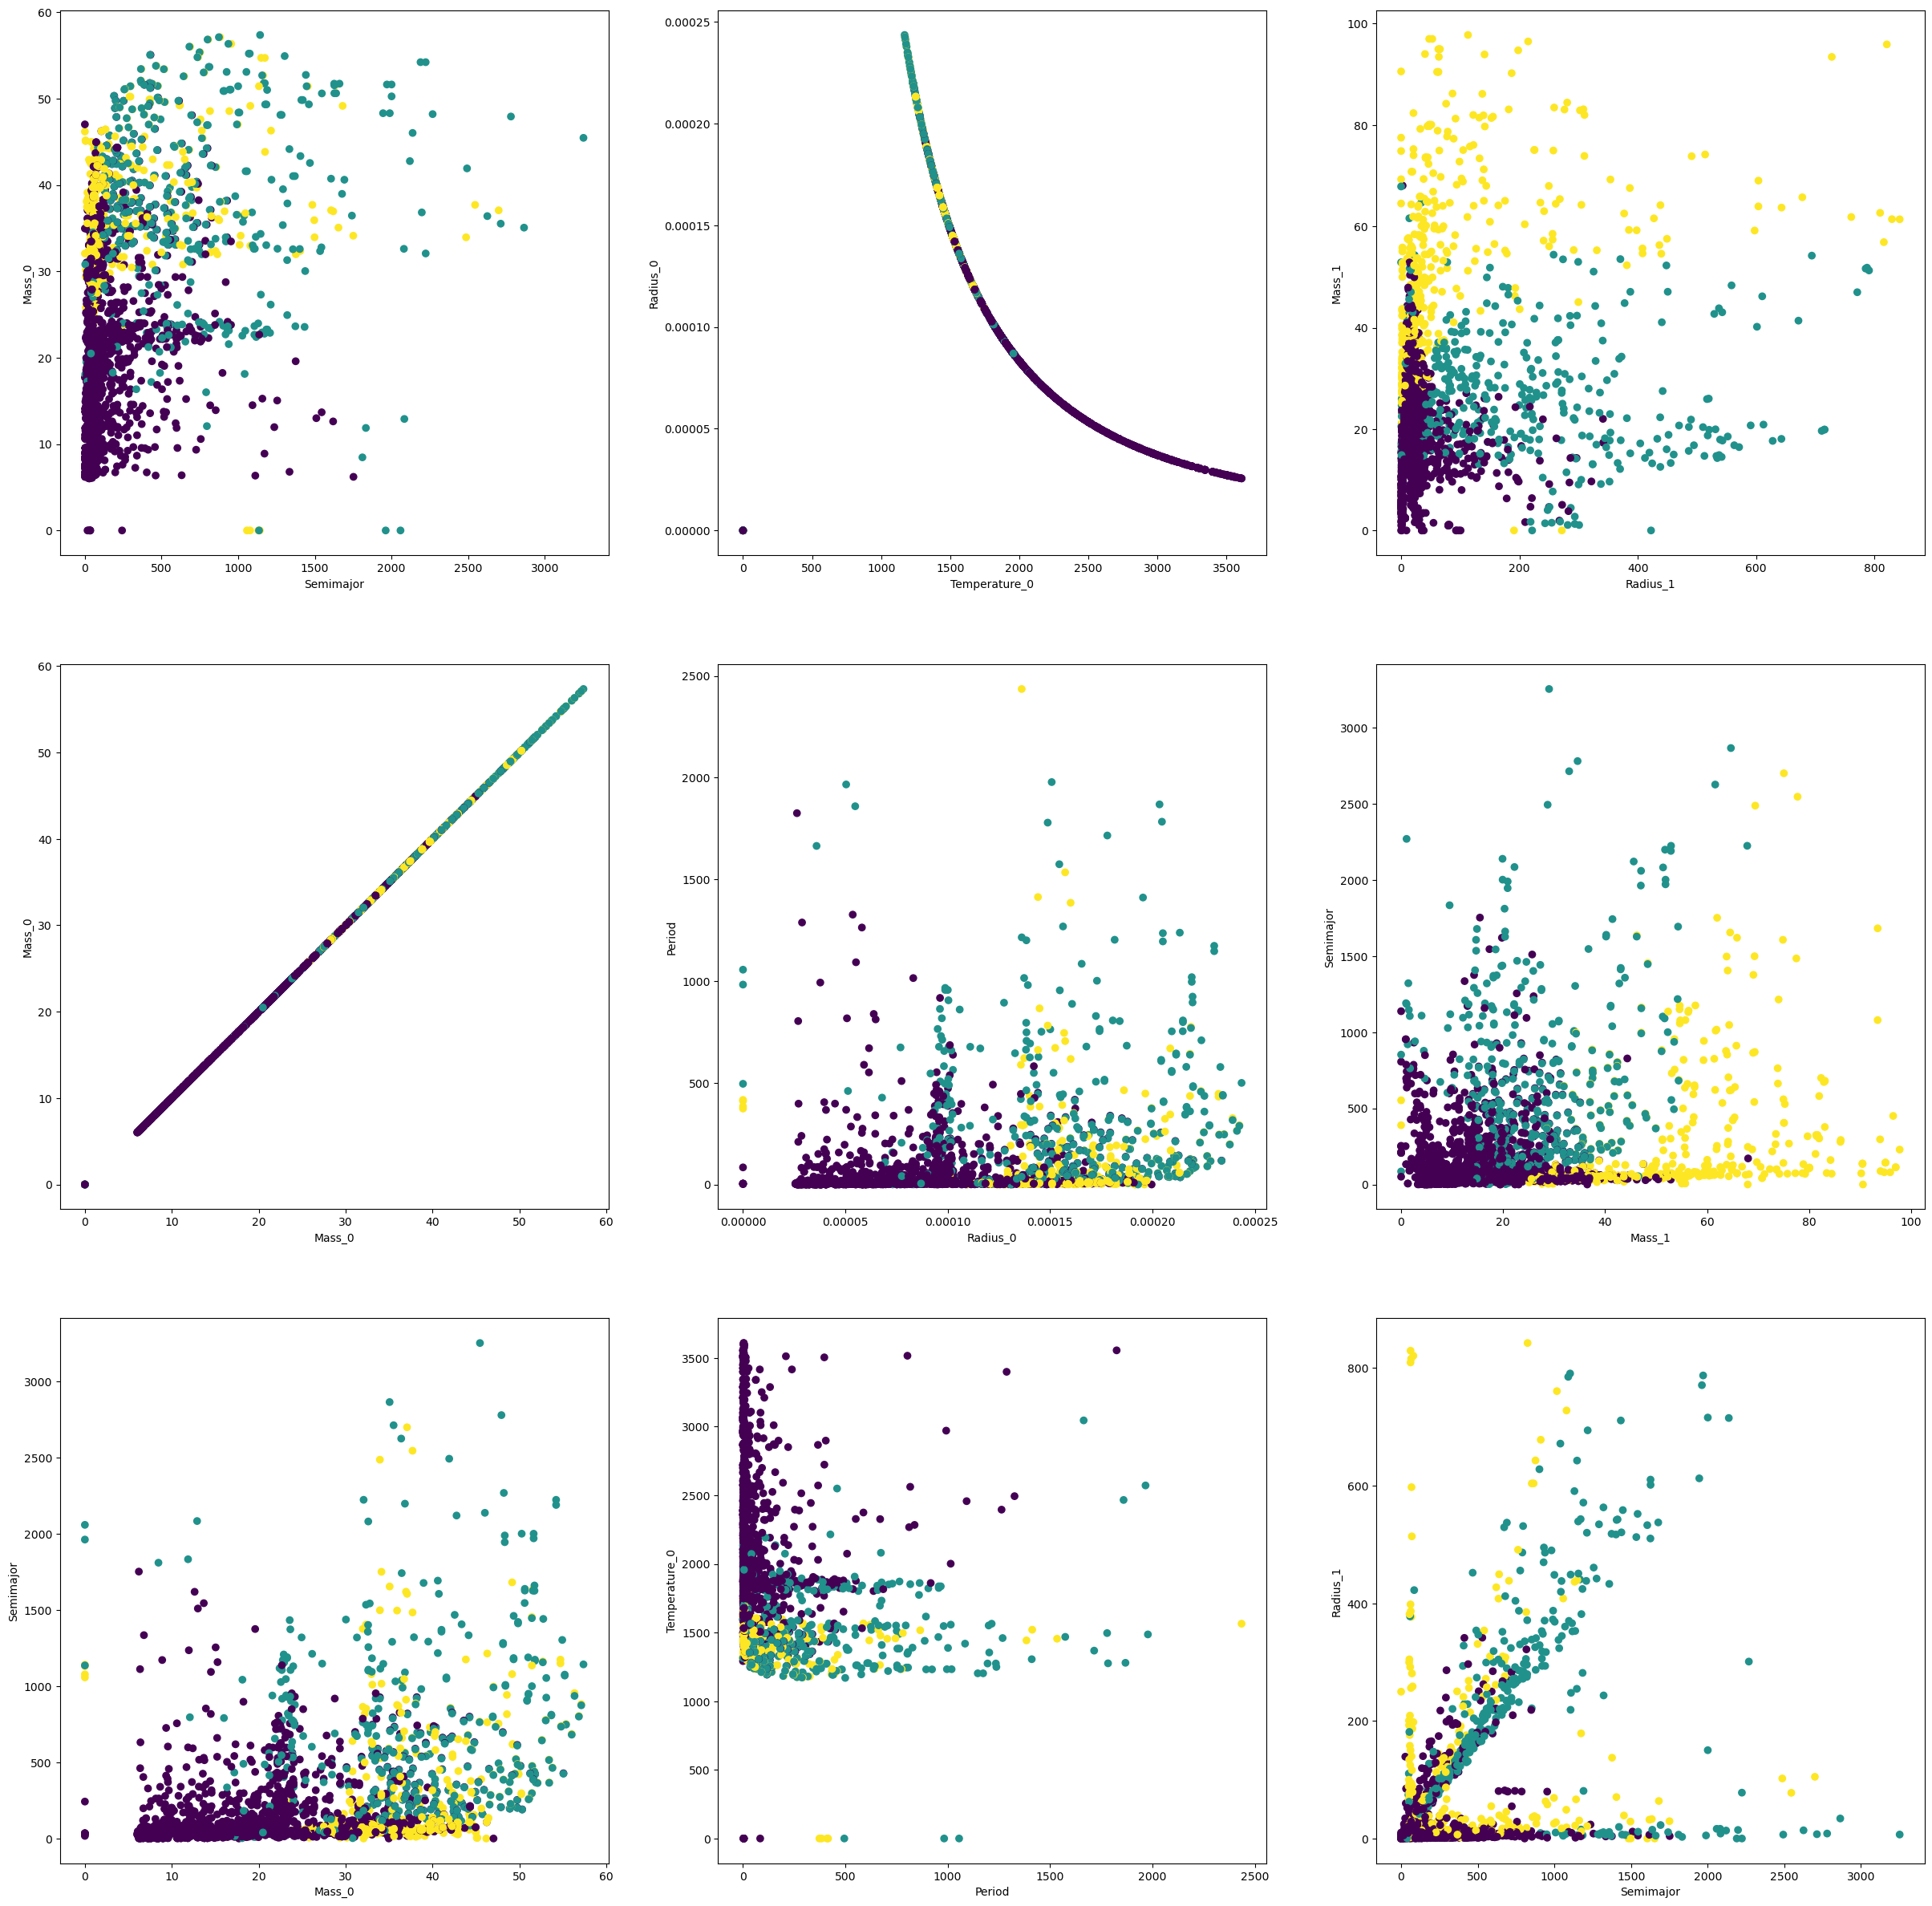

In [46]:
# Create scatter plot matrix with top three features for each cluster
fig, axes = plt.subplots(nrows=optimal_clusters, ncols=3, figsize=(30,30))
for i in range(optimal_clusters):
    for j in range(3):
        axes[i,j].scatter(data_clean[cols[feature_indices[i][j]]], data_clean[cols[feature_indices[(i+1)%optimal_clusters][j]]], c=labels, cmap='viridis')
        axes[i,j].set_xlabel(cols[feature_indices[i][j]])
        axes[i,j].set_ylabel(cols[feature_indices[(i+1)%optimal_clusters][j]])
plt.show()

In [26]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto', tol=-0.01, direction="backward")

sfs.fit(X=data_clean, y=None)

sfs.get_params()

sfs.get_feature_names_out()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py", line 684, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positional argument: 'y'


In [33]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X=data_clean)
selector.support_


selector.ranking_

TypeError: fit() missing 1 required positional argument: 'y'

# PCA test

In [34]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [35]:
scaler = StandardScaler()
scaler.fit(data_clean)

data_scaled = scaler.transform(data_clean)

The number of principal components to keep after performing PCA depends on the amount of information you want to retain from the original dataset. One way to determine the number of components to keep is to calculate the explained variance ratio for each component and choose the number of components that explain a desired amount of variance.  
One common approach is to choose the number of components that explain a desired amount of variance, such as 95% or 99%.

In [36]:
pca=PCA(0.95)
x_pca = pca.fit_transform(data_scaled)

In [37]:
pca.explained_variance_ratio_

array([0.33884157, 0.14221391, 0.12491358, 0.10701394, 0.07517123,
       0.06261983, 0.04401578, 0.03422156, 0.02663085])

In [41]:
corr_matrix = pd.DataFrame(x_pca).corr(method='pearson')
np.fill_diagonal(corr_matrix.values, 0)

sorted_corr = abs(corr_matrix).where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)

sorted_corr

C:\Users\gabri\AppData\Local\Temp\ipykernel_18868\1791133300.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sorted_corr = abs(corr_matrix).where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)


4  5    8.472272e-16
   6    6.615976e-16
6  7    5.582839e-16
2  3    4.202134e-16
3  4    4.036857e-16
5  8    2.500071e-16
4  8    2.101281e-16
0  1    2.072772e-16
1  6    1.771585e-16
   2    1.771538e-16
5  7    1.625419e-16
1  7    1.621606e-16
2  6    1.491286e-16
7  8    1.433984e-16
6  8    1.378173e-16
3  8    1.369709e-16
0  4    1.294087e-16
1  8    1.134861e-16
3  7    9.614318e-17
0  3    8.171361e-17
   2    7.868393e-17
2  5    5.386464e-17
5  6    5.279519e-17
1  3    4.939968e-17
4  7    4.532647e-17
0  8    3.900429e-17
   5    3.870735e-17
3  5    3.747488e-17
   6    3.088019e-17
1  5    2.138725e-17
2  7    2.060257e-17
   8    1.725487e-17
0  6    1.119363e-17
2  4    9.955770e-18
1  4    5.706395e-18
0  7    4.970127e-18
dtype: float64

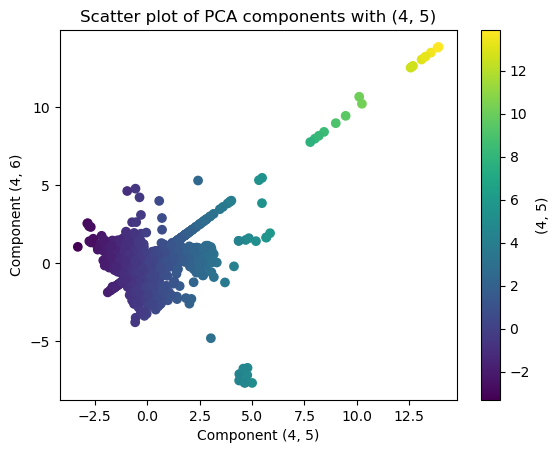

In [42]:
# Extract the two best correlated components from the sorted correlation matrix
comp1, comp2 = sorted_corr[0:2].index

# Extract the best correlated parameter from the sorted correlation matrix
color_param = sorted_corr[0:].index[0]

# Create a scatter plot with the two best correlated components as the x and y axes, and the best correlated parameter as the color or size of the points
plt.scatter(x_pca[:, comp1], x_pca[:, comp2], c=x_pca[:, color_param])
plt.xlabel(f"Component {comp1}")
plt.ylabel(f"Component {comp2}")
plt.colorbar(label=f"{color_param}")
plt.title(f"Scatter plot of PCA components with {color_param}")
plt.show()

In [43]:
print(data_clean.columns[4], data_clean.columns[5], data_clean.columns[6])

#max(data_clean['RemnantType_0'])

RHE_0 RCO_0 Luminosity_0


In [44]:
x_pca.shape

(2532, 9)

In [45]:
# Assuming 'data' is your original dataset and 'principal_components' is your PCA output
data_clean['PC1'] = x_pca[:,0]
data_clean['PC2'] = x_pca[:,1]

# Calculate the Pearson correlation coefficient between each parameter and the principal components
corr_matrix = data_clean.corr(method='pearson')

# Identify the parameters with the highest correlation coefficients with PC1 and PC2
best_params = corr_matrix.nlargest(2, ['PC1', 'PC2']).index.tolist()[:2]


In [46]:
print(best_params)

['PC1', 'Zams_1']


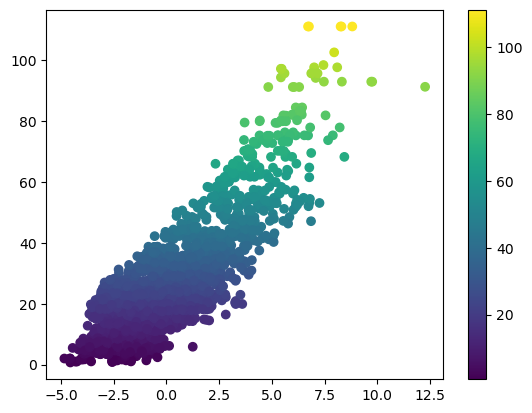

In [48]:
plt.scatter(data_clean[best_params[0]], data_clean[best_params[1]], c=data_clean['Zams_1'])
plt.colorbar()

In [49]:
components = pca.components_
print(components)

[[ 3.44587545e-01 -1.11022302e-16 -5.55111512e-17  3.44587084e-01
   0.00000000e+00 -2.16840434e-19  0.00000000e+00 -3.11054720e-01
   3.49536839e-01  3.50469247e-01  2.71223700e-01  1.03125240e-01
   2.03575816e-01 -1.81302628e-02  7.15007204e-02  3.31236337e-01
  -1.02484545e-01  3.52346947e-01  1.49442631e-01 -3.83556529e-02
   5.92163256e-02 -1.34157947e-01]
 [ 1.23444813e-01  1.38777878e-17 -5.55111512e-17  1.23446638e-01
  -1.11022302e-16 -5.55111512e-17 -0.00000000e+00 -1.08895049e-01
   1.48432301e-02 -2.46778408e-01 -1.88967168e-01  3.74442339e-01
   2.88468097e-01  9.36678498e-02  3.90060172e-01 -2.66155417e-01
  -1.60692941e-01 -2.48847793e-01  4.03411011e-01  4.74563980e-02
   3.28451546e-01  2.12214617e-01]
 [-3.43494864e-02  2.22044605e-16 -1.24900090e-16 -3.43491849e-02
  -6.93889390e-17  1.52655666e-16 -1.11022302e-16  4.58932635e-02
   8.46866530e-02  8.56836674e-02 -1.58667682e-01 -4.17556292e-01
  -5.09747168e-02  1.14863102e-02 -4.32468005e-01 -2.38711206e-02
  -1.7

In [50]:
scaler = StandardScaler()
scaler.fit(data_clean)

data_scaled = scaler.transform(data_clean)

In [51]:
pca = PCA(n_components=6)
pca.fit(data_clean)
print(pca.n_components_)

6


In [52]:
n_components = pca.n_components_
pca = PCA(n_components=n_components)
pca.fit(data_clean)
data_reduced = pca.transform(data_clean)
print(data_reduced.shape)

(2532, 6)


In [53]:
corr_matrix = np.corrcoef(data_reduced.T)
max_corr = np.max(corr_matrix - np.eye(6)*2)
max_corr_idx = np.argmax(corr_matrix - np.eye(6)*2)
p1, p2 = np.unravel_index(max_corr_idx, corr_matrix.shape)
print(f'The two parameters with the highest correlation are {p1} and {p2} with a correlation of {max_corr}.')


The two parameters with the highest correlation are 1 and 0 with a correlation of 9.120885395272305e-14.


In [54]:
cov_matrix = np.cov(data_reduced.T)
cov_matrix_reduced = cov_matrix[[p1, p2]][:, [p1, p2]]
print(cov_matrix_reduced)

[[1.95278709e+09 1.87764192e-03]
 [1.87764192e-03 2.17018448e+11]]


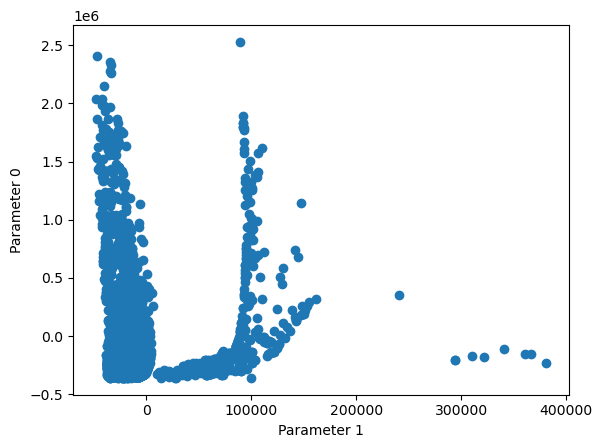

In [55]:
plt.scatter(data_reduced[:,p1], data_reduced[:,p2])
plt.xlabel(f'Parameter {p1}')
plt.ylabel(f'Parameter {p2}')
plt.show()


In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_reduced)
labels = kmeans.labels_
np.savetxt('labels.txt', labels)
print(labels)

C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]


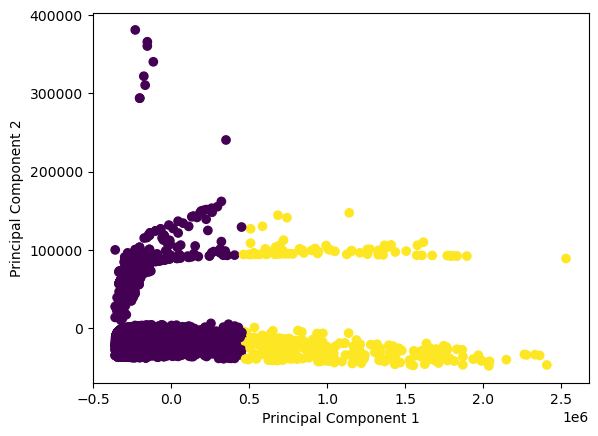

In [57]:
plt.scatter(data_reduced[:,0], data_reduced[:,1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()